# Preparation

In [1]:
# This file is based on: 5_presence_of_accident_corr for local environment
# Correlation, Regression, Feature selection
# Random forest classification
# Principal component analysis

In [2]:
import torch
torch.cuda.empty_cache() 

In [3]:
import os 
os.environ['MPLCONFIGDIR'] = os.getcwd() + "/configs/"
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import cv2
import urllib.request
from PIL import Image

In [4]:
import pandas as pd
import pyproj

In [5]:
from pathlib import Path
import sklearn
import seaborn as sn
from scipy import stats
from tabulate import tabulate
import statsmodels.api as sm
import statsmodels.tools as tools

In [6]:
from mtp_function_yl import *

In [7]:
# pip install category_encoders

In [8]:
import sklearn
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
import category_encoders as ce
from sklearn import svm
# For regression
from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import PredictionErrorDisplay
import mlxtend
# For stepwise feature selection
from mlxtend.feature_selection import SequentialFeatureSelector
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

In [9]:
from sklearn.inspection import permutation_importance

In [54]:
from sklearn.decomposition import PCA
from numpy.linalg import eig

In [11]:
# import shap

In [12]:
import joblib

In [13]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [14]:
# For documentation and version control
# pip install watermark
%load_ext watermark

In [15]:
%watermark  -u -d -v -m --iversions

Last updated: 2025-01-22

Python implementation: CPython
Python version       : 3.9.7
IPython version      : 7.29.0

Compiler    : MSC v.1916 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 158 Stepping 10, GenuineIntel
CPU cores   : 12
Architecture: 64bit

numpy            : 1.26.4
PIL              : 8.4.0
torch            : 2.0.1
mlxtend          : 0.23.1
pyproj           : 3.3.1
joblib           : 1.4.2
pandas           : 1.3.4
matplotlib       : 3.4.3
category_encoders: 2.6.4
seaborn          : 0.11.2
cv2              : 4.8.1
statsmodels      : 0.14.1
shapely          : 1.8.2
sklearn          : 1.5.1
scipy            : 1.11.3



# Data Loading and Processing

## Data loading

In [16]:
# For Science Apps
# dfacrpv = pd.read_csv('/home/yelhe/script/mtp/redo_model_input/model_acp_transformed_corr.csv')

# For local environment 
dfacrpv = pd.read_csv('../mtp_jan/model_acp_transformed_corr.csv')

In [17]:
# For information of categorical variables
dfraw = pd.read_csv('../mtp_jan/model_acp_rawvar.csv')

In [18]:
dfraw.columns

Index(['Nr', 'mewmin', 'megmin', 'iemin', 'mewmax', 'megmax', 'iemax', 'mew',
       'meg', 'ie', 'cmean', 'cmin', 'csum', 'cmax', 'cp', 'dbusl', 'dtraml',
       'dtrainl', 'dplight', 'dstation', 'dparkcar', 'dparktw', 'dpedcro',
       'dstopsign', 'dcurb', 'curbtype', 'dgvm', 'gvm_dwv', 'gvm_msp',
       'gvm_asp', 'z_qnr', 'z_knr', 'trafficarea', 'dtrafficarea', 'r_width',
       'droad', 'speedlimit', 'droad_sl', 'd_bicyclecount', 'bicyclecount',
       'd_carcount', 'carcount', 'dvfpath', 'acp'],
      dtype='object')

In [37]:
# For categorical variables
cvl = ['Nr','z_qnr', 'z_knr', 'trafficarea', 'r_width','speedlimit']
cvloh = ['Nr','z_qnr_1', 'z_qnr_2', 'z_qnr_3', 'z_qnr_4',
       'z_qnr_5', 'z_qnr_6', 'z_qnr_7', 'z_qnr_8', 'z_qnr_9', 'z_qnr_10',
       'z_qnr_11', 'z_qnr_12', 'z_qnr_13', 'z_qnr_14', 'z_qnr_15', 'z_qnr_16',
       'z_qnr_17', 'z_qnr_18', 'z_qnr_19', 'z_qnr_20', 'z_qnr_21', 'z_qnr_22',
       'z_qnr_23', 'z_qnr_24', 'z_qnr_25', 'z_qnr_26', 'z_qnr_27', 'z_qnr_28',
       'z_qnr_29', 'z_qnr_30', 'z_qnr_31', 'z_qnr_32', 'z_qnr_33', 'z_knr_1',
       'z_knr_2', 'z_knr_3', 'z_knr_4', 'z_knr_5', 'z_knr_6', 'z_knr_7',
       'z_knr_8', 'z_knr_9', 'z_knr_10', 'z_knr_11', 'trafficarea_1',
       'trafficarea_2', 'r_width_1', 'r_width_2', 'r_width_3', 'r_width_4',
       'r_width_5', 'r_width_6', 'speedlimit_1', 'speedlimit_2',
       'speedlimit_3', 'speedlimit_4', 'speedlimit_5', 'speedlimit_6']

In [38]:
dfcat = dfraw[cvl]
dfcatoh = dfacrpv[cvloh]

In [41]:
dfcatsum = pd.merge(dfcat, dfcatoh, on = ['Nr'])

In [109]:
# # i = 1
# i = i+1
# print(i, cvloh[i])
# dfcatsum.groupby(['speedlimit', cvloh[i]]).size()

58 speedlimit_6


speedlimit  speedlimit_6
0.0         0               170
20.0        0                31
30.0        0               417
50.0        0               439
60.0        0                17
80.0        1                 7
100.0       0                 6
dtype: int64

In [112]:
# For information of numeric variables
nvl = ['mewmin', 'megmin', 'iemin', 'mewmax', 'megmax', 'iemax', 'mew',
       'meg', 'ie', 'cmean', 'cmin', 'csum', 'cmax', 'cp', 'dbusl', 'dtraml',
       'dtrainl', 'dplight', 'dstation', 'dparkcar', 'dparktw', 'dpedcro',
       'dstopsign', 'dcurb', 'curbtype', 'dgvm', 'gvm_dwv', 'gvm_msp',
       'gvm_asp', 'z_qnr', 'z_knr', 'trafficarea', 'dtrafficarea', 'r_width',
       'droad', 'speedlimit', 'droad_sl', 'd_bicyclecount', 'bicyclecount',
       'd_carcount', 'carcount', 'dvfpath']

In [175]:
# i = i+1
# print(i, nvl[i])
# plt.hist(dfacrpv[nvl[i]])

In [176]:
# dfacrpv.groupby([nvl[i]]).size()

## Checking correlation and multicollinearity

In [19]:
cn = ['cmean', 'cmin', 'csum', 'cmax', 'cp', 'mewmin', 'megmin',
       'iemin', 'mewmax', 'megmax', 'iemax', 'mew', 'meg', 'ie', 'dbusl',
       'dtraml', 'dtrainl', 'dplight', 'dstation', 'dparkcar', 'dparktw',
       'dpedcro', 'dstopsign', 'dtrafficarea', 'droad', 'droad_sl',
       'gvm_dwv', 'gvm_msp', 'gvm_asp', 'r_width', 'speedlimit',
       'bicyclecount', 'carcount', 'z_qnr_1', 'z_qnr_2', 'z_qnr_3', 'z_qnr_4',
       'z_qnr_5', 'z_qnr_6', 'z_qnr_7', 'z_qnr_8', 'z_qnr_9', 'z_qnr_10',
       'z_qnr_11', 'z_qnr_12', 'z_qnr_13', 'z_qnr_14', 'z_qnr_15', 'z_qnr_16',
       'z_qnr_17', 'z_qnr_18', 'z_qnr_19', 'z_qnr_20', 'z_qnr_21', 'z_qnr_22',
       'z_qnr_23', 'z_qnr_24', 'z_qnr_25', 'z_qnr_26', 'z_qnr_27', 'z_qnr_28',
       'z_qnr_29', 'z_qnr_30', 'z_qnr_31', 'z_qnr_32', 'z_qnr_33', 'z_knr_1',
       'z_knr_2', 'z_knr_3', 'z_knr_4', 'z_knr_5', 'z_knr_6', 'z_knr_7',
       'z_knr_8', 'z_knr_9', 'z_knr_10', 'z_knr_11', 'trafficarea_1',
       'trafficarea_2', 'r_width_1', 'r_width_2', 'r_width_3', 'r_width_4',
       'r_width_5', 'r_width_6', 'speedlimit_1', 'speedlimit_2',
       'speedlimit_3', 'speedlimit_4', 'speedlimit_5', 'speedlimit_6']

# n_th dummy variables, not-good-resource variable were already removed
# Need to remove dvfpath, which is generated from the same data with qseudo points
## Which is: dvfpath is 0 for all pseudo points, since the pseudo points were generated as random points distributed on it.

In [20]:
print(len(cn))

91


In [21]:
dfi = dfacrpv[cn]

In [22]:
# Check correlation
corr_m = dfi.corr()
sorted_corrm = corr_m.unstack().sort_values()
upper_corrm = corr_m.where(
                np.triu(np.ones(corr_m.shape),k = 1).astype(bool))
unique_corrpair = upper_corrm.unstack().dropna()
sorted_uni_cp = unique_corrpair.sort_values()
dfsucp = sorted_uni_cp.to_frame()

In [23]:
# dfsucp.to_csv('/home/yelhe/script/mtp/tables/AfterRedoTransformation/correlation.csv',index = True)

In [24]:
dfsucp = dfsucp.rename(columns = {0:'corr'})

In [25]:
dfcorr_high = dfsucp.loc[(dfsucp['corr'] <= -0.8) | (dfsucp['corr'] >= 0.8)]

In [26]:
dfcorr_high

,,corr
speedlimit_4,speedlimit,-0.822594
z_knr_10,z_qnr_15,0.818377
z_knr_7,z_qnr_8,0.853376
mew,mewmax,0.853716
meg,megmin,0.859011
mew,mewmin,0.872107
cp,cmean,0.908996
ie,iemax,0.920179
cp,csum,0.927290
droad_sl,droad,0.942433


In [27]:
# Need to remove:
# speedlimit_4, z_qnr_15, z_qnr_8, mewmax, megmin, mewmin, cmean, iemax, csum, 
# droad_sl, cmax, iemin, gvm_asp, gvm_msp
cnu = ['cp', 'cmin',  
       'ie', 'mew', 'meg', 'megmax', 'dbusl',
       'dtraml', 'dtrainl', 'dplight', 'dstation', 'dparkcar', 'dparktw',
       'dpedcro', 'dstopsign', 'dtrafficarea', 'droad',
       'gvm_dwv', 'r_width', 'speedlimit',
       'bicyclecount', 'carcount', 'z_qnr_1', 'z_qnr_2', 'z_qnr_3', 'z_qnr_4',
       'z_qnr_5', 'z_qnr_6', 'z_qnr_7', 'z_qnr_9', 'z_qnr_10',
       'z_qnr_11', 'z_qnr_12', 'z_qnr_13', 'z_qnr_14', 'z_qnr_16',
       'z_qnr_17', 'z_qnr_18', 'z_qnr_19', 'z_qnr_20', 'z_qnr_21', 'z_qnr_22',
       'z_qnr_23', 'z_qnr_24', 'z_qnr_25', 'z_qnr_26', 'z_qnr_27', 'z_qnr_28',
       'z_qnr_29', 'z_qnr_30', 'z_qnr_31', 'z_qnr_32', 'z_qnr_33', 'z_knr_1',
       'z_knr_2', 'z_knr_3', 'z_knr_4', 'z_knr_5', 'z_knr_6', 'z_knr_7',
       'z_knr_8', 'z_knr_9', 'z_knr_10', 'z_knr_11', 'trafficarea_1',
       'trafficarea_2', 'r_width_1', 'r_width_2', 'r_width_3', 'r_width_4',
       'r_width_5', 'r_width_6', 'speedlimit_1', 'speedlimit_2',
       'speedlimit_3', 'speedlimit_5', 'speedlimit_6']


In [28]:
# calculating VIF for each feature
X = dfacrpv[cnu]
X = tools.add_constant(X)
dfcnu_vif = pd.DataFrame()
dfcnu_vif["feature"] = X.columns
dfcnu_vif["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

print(dfcnu_vif)
viflow = dfcnu_vif.loc[dfcnu_vif['VIF'] <= 5]
vifl = viflow['feature'].tolist()
print(vifl, len(vifl))

E:\Anaconda\Anaconda_file\lib\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
E:\Anaconda\Anaconda_file\lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


         feature        VIF
0          const   0.000000
1             cp   1.253093
2           cmin   1.079378
3             ie   1.202268
4            mew   1.354945
..           ...        ...
73  speedlimit_1  15.776524
74  speedlimit_2   2.002177
75  speedlimit_3   8.385828
76  speedlimit_5   2.325398
77  speedlimit_6   2.034892

[78 rows x 2 columns]
['const', 'cp', 'cmin', 'ie', 'mew', 'meg', 'megmax', 'dbusl', 'dtraml', 'dtrainl', 'dplight', 'dstation', 'dparkcar', 'dparktw', 'dpedcro', 'dstopsign', 'dtrafficarea', 'droad', 'gvm_dwv', 'bicyclecount', 'carcount', 'z_qnr_25', 'z_qnr_28', 'trafficarea_1', 'trafficarea_2', 'speedlimit_2', 'speedlimit_5', 'speedlimit_6'] 28


In [29]:
# Above using pairwise correlation

In [30]:
# Following using VIF for multicollinearity
cnforvif = ['cp', 'cmin',  
       'ie', 'mew', 'meg', 'megmax', 'dbusl',
       'dtraml', 'dtrainl', 'dplight', 'dstation', 'dparkcar', 'dparktw',
       'dpedcro', 'dstopsign', 'dtrafficarea', 'droad',
       'gvm_dwv', 'r_width', 'speedlimit',
       'bicyclecount', 'carcount', 'z_qnr_1', 'z_qnr_2', 'z_qnr_3', 'z_qnr_4',
       'z_qnr_5', 'z_qnr_6', 'z_qnr_7', 'z_qnr_9', 'z_qnr_10',
       'z_qnr_11', 'z_qnr_12', 'z_qnr_13', 'z_qnr_14', 'z_qnr_16',
       'z_qnr_17', 'z_qnr_18', 'z_qnr_19', 'z_qnr_20', 'z_qnr_21', 'z_qnr_22',
       'z_qnr_23', 'z_qnr_24', 'z_qnr_25', 'z_qnr_26', 'z_qnr_27', 'z_qnr_28',
       'z_qnr_29', 'z_qnr_30', 'z_qnr_31', 'z_qnr_32', 'z_qnr_33', 'z_knr_1',
       'z_knr_2', 'z_knr_3', 'z_knr_4', 'z_knr_5', 'z_knr_6', 'z_knr_7',
       'z_knr_8', 'z_knr_9', 'z_knr_10', 'z_knr_11', 'trafficarea_1',
       'trafficarea_2', 'r_width_1', 'r_width_2', 'r_width_3', 'r_width_4',
       'r_width_5', 'r_width_6', 'speedlimit_1', 'speedlimit_2',
       'speedlimit_3', 'speedlimit_5', 'speedlimit_6']

In [31]:
print(len(cnu), len(cnforvif))

77 77


In [32]:
# calculating VIF for each feature

# Remove 'z_qnr_18', 'z_qnr_19', 'z_qnr_29', 'z_qnr_30',  
# Remove 'z_qnr_16', 'z_qnr_5',  'z_qnr_20', 'z_qnr_27', 'z_qnr_10',
# Remove 'z_knr_8', 'speedlimit_1', 'z_knr_1', 'z_knr_5', 'r_width_2', 
# Remove 'z_knr_6','z_knr_4','r_width',

cntry0 = ['cp', 'cmin',
       'ie', 'mew', 'meg', 'megmax', 'dbusl',
       'dtraml', 'dtrainl', 'dplight', 'dstation', 'dparkcar', 'dparktw',
       'dpedcro', 'dstopsign', 'dtrafficarea', 'droad',
       'gvm_dwv',  'speedlimit',
       'bicyclecount', 'carcount', 'z_qnr_1', 'z_qnr_2', 'z_qnr_3', 'z_qnr_4',
        'z_qnr_6', 'z_qnr_7', 'z_qnr_9',
       'z_qnr_11', 'z_qnr_12', 'z_qnr_13', 'z_qnr_14',
       'z_qnr_17',  'z_qnr_21', 'z_qnr_22',
       'z_qnr_23', 'z_qnr_24', 'z_qnr_25', 'z_qnr_26', 'z_qnr_28',
         'z_qnr_31', 'z_qnr_32', 'z_qnr_33',
       'z_knr_2', 'z_knr_3',  'z_knr_7',
        'z_knr_9', 'z_knr_10', 'z_knr_11', 'trafficarea_1',
       'trafficarea_2', 'r_width_1',  'r_width_3', 'r_width_4',
       'r_width_5', 'r_width_6', 'speedlimit_2',
       'speedlimit_3', 'speedlimit_5', 'speedlimit_6']
X = dfacrpv[cntry0]
X = tools.add_constant(X)
dfcnu_vif1 = pd.DataFrame()
dfcnu_vif1["feature"] = X.columns
dfcnu_vif1["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

print(dfcnu_vif1.sort_values(by = ['VIF']))

         feature        VIF
2           cmin   1.077604
3             ie   1.170543
59  speedlimit_5   1.199438
35      z_qnr_22   1.214720
53     r_width_3   1.217752
..           ...        ...
16  dtrafficarea   2.821565
47       z_knr_9   2.870266
49      z_knr_11   3.787517
44       z_knr_2   3.964978
0          const  62.561304

[61 rows x 2 columns]


In [33]:
print(cntry0,len(cntry0))

['cp', 'cmin', 'ie', 'mew', 'meg', 'megmax', 'dbusl', 'dtraml', 'dtrainl', 'dplight', 'dstation', 'dparkcar', 'dparktw', 'dpedcro', 'dstopsign', 'dtrafficarea', 'droad', 'gvm_dwv', 'speedlimit', 'bicyclecount', 'carcount', 'z_qnr_1', 'z_qnr_2', 'z_qnr_3', 'z_qnr_4', 'z_qnr_6', 'z_qnr_7', 'z_qnr_9', 'z_qnr_11', 'z_qnr_12', 'z_qnr_13', 'z_qnr_14', 'z_qnr_17', 'z_qnr_21', 'z_qnr_22', 'z_qnr_23', 'z_qnr_24', 'z_qnr_25', 'z_qnr_26', 'z_qnr_28', 'z_qnr_31', 'z_qnr_32', 'z_qnr_33', 'z_knr_2', 'z_knr_3', 'z_knr_7', 'z_knr_9', 'z_knr_10', 'z_knr_11', 'trafficarea_1', 'trafficarea_2', 'r_width_1', 'r_width_3', 'r_width_4', 'r_width_5', 'r_width_6', 'speedlimit_2', 'speedlimit_3', 'speedlimit_5', 'speedlimit_6'] 60


In [34]:
# # calculating VIF for each feature


# cntry1 = ['cp', 'cmin', 
#        'ie', 'mew', 'meg', 'megmax', 'dbusl',
#        'dtraml', 'dtrainl', 'dplight', 'dstation', 'dparkcar', 'dparktw',
#        'dpedcro', 'dstopsign', 'dtrafficarea', 'droad', 
#        'gvm_dwv', 'r_width', 'speedlimit',
#        'bicyclecount', 'carcount']
# X = dfacrpv[cntry1]
# X = tools.add_constant(X)
# dfcnu_vif2 = pd.DataFrame()
# dfcnu_vif2["feature"] = X.columns
# dfcnu_vif2["VIF"] = [variance_inflation_factor(X.values, i)
#                           for i in range(len(X.columns))]

# print(dfcnu_vif2.sort_values(by = ['VIF']))

In [35]:
cn_vif = dfcnu_vif1['feature'].tolist()
cn_vif.remove('const')
print(cn_vif, len(cn_vif))

['cp', 'cmin', 'ie', 'mew', 'meg', 'megmax', 'dbusl', 'dtraml', 'dtrainl', 'dplight', 'dstation', 'dparkcar', 'dparktw', 'dpedcro', 'dstopsign', 'dtrafficarea', 'droad', 'gvm_dwv', 'speedlimit', 'bicyclecount', 'carcount', 'z_qnr_1', 'z_qnr_2', 'z_qnr_3', 'z_qnr_4', 'z_qnr_6', 'z_qnr_7', 'z_qnr_9', 'z_qnr_11', 'z_qnr_12', 'z_qnr_13', 'z_qnr_14', 'z_qnr_17', 'z_qnr_21', 'z_qnr_22', 'z_qnr_23', 'z_qnr_24', 'z_qnr_25', 'z_qnr_26', 'z_qnr_28', 'z_qnr_31', 'z_qnr_32', 'z_qnr_33', 'z_knr_2', 'z_knr_3', 'z_knr_7', 'z_knr_9', 'z_knr_10', 'z_knr_11', 'trafficarea_1', 'trafficarea_2', 'r_width_1', 'r_width_3', 'r_width_4', 'r_width_5', 'r_width_6', 'speedlimit_2', 'speedlimit_3', 'speedlimit_5', 'speedlimit_6'] 60


In [36]:
cnvif = cn_vif

In [37]:
# Write cnvif into a text file
with open('cn_filtered.txt', 'w') as f:
    for line in cnvif:
        f.write(f"{line}\n")

In [38]:
# dfcnu_vif1.to_csv('/home/yelhe/script/mtp/tables/AfterRedoTransformation/dfcnu_VIF.csv', index = False)

In [43]:
y = dfacrpv['acp']
# x = dfacrpv[cnu]
x = dfacrpv[cnvif] # Variables after filtering with correlation and VIF (60)
# x = dfacrpv[cntry1] # 59 Variables, removing 'cmin'

# x = dfacrpv[cnvifnew] #  cnvifnew = cnvif + 'cmean' (61)
# x = dfacrpv[cntryn] # only using VIF without correlation(63)

In [44]:
# Another set cnvifnew = cnvif + 'cmean'
cnvifnew = ['cp', 'cmin','cmean',
            'ie', 'mew', 'meg', 'megmax', 'dbusl', 'dtraml', 'dtrainl', 
            'dplight', 'dstation', 'dparkcar', 'dparktw', 'dpedcro',
            'dstopsign', 'dtrafficarea', 'droad', 'gvm_dwv', 'speedlimit',
            'bicyclecount', 'carcount', 'z_qnr_1', 'z_qnr_2', 'z_qnr_3', 
            'z_qnr_4', 'z_qnr_6', 'z_qnr_7', 'z_qnr_9', 'z_qnr_11', 'z_qnr_12',
            'z_qnr_13', 'z_qnr_14', 'z_qnr_17', 'z_qnr_21', 'z_qnr_22',
            'z_qnr_23', 'z_qnr_24', 'z_qnr_25', 'z_qnr_26', 'z_qnr_28',
            'z_qnr_31', 'z_qnr_32', 'z_qnr_33', 'z_knr_2', 'z_knr_3',
            'z_knr_7', 'z_knr_9', 'z_knr_10', 'z_knr_11', 'trafficarea_1', 
            'trafficarea_2', 'r_width_1', 'r_width_3', 'r_width_4', 
            'r_width_5', 'r_width_6', 'speedlimit_2', 'speedlimit_3', 
            'speedlimit_5', 'speedlimit_6']

In [45]:
# y.shape
x.shape
# 1087 points with 78 features in total

(1087, 60)

In [46]:
# cnvif1 = ['cp', 'cmin', 'cmean',
#           'ie', 'mew', 'meg', 'megmax', 'dbusl', 'dtraml', 'dtrainl', 'dplight',
#           'dstation', 'dparkcar', 'dparktw', 'dpedcro', 'dstopsign', 'dtrafficarea',
#           'droad', 'gvm_dwv', 'r_width', 'speedlimit', 'bicyclecount',
#           'carcount', 'z_qnr_1', 'z_qnr_7', 'z_qnr_9', 'z_qnr_10', 'z_qnr_11',
#           'z_qnr_12', 'z_qnr_13', 'z_qnr_14', 'z_qnr_16', 'z_qnr_17', 'z_qnr_18',
#           'z_qnr_19', 'z_qnr_20', 'z_qnr_21', 'z_qnr_22', 'z_qnr_23', 'z_qnr_24',
#           'z_qnr_25', 'z_qnr_26', 'z_qnr_27', 'z_qnr_28', 'z_qnr_29', 'z_qnr_30',
#           'z_qnr_31', 'z_qnr_32', 'z_knr_2', 'z_knr_3', 'z_knr_5', 'z_knr_7',
#           'z_knr_10', 'trafficarea_1', 'trafficarea_2', 'r_width_1', 'r_width_2',
#           'r_width_4', 'r_width_6', 'speedlimit_2', 'speedlimit_3', 'speedlimit_5',
#           'speedlimit_6']

In [47]:
# Filtering only with VIF (just to check if the filtered result is the same)
# calculating VIF for each feature
# Remove 'speedlimit_6','z_qnr_23','z_qnr_11','z_qnr_26', 'z_qnr_10',
# Remove'r_width','z_knr_2', 'z_qnr_15','z_qnr_9', 'z_qnr_20',
# Remove 'z_qnr_8', 'z_knr_11','z_qnr_3', 'csum', 'speedlimit_4', 
# Remove'gvm_asp', 'gvm_msp',  'ie','cmax', 'mew','z_knr_8',
# Remove 'z_knr_1','meg',  'droad_sl', 'speedlimit_1', 'r_width_2', 
# Remove'z_knr_6','cmean',


cntryn = [ 'cmin', 'cp', 'mewmin', 'megmin',
       'iemin', 'mewmax', 'megmax', 'iemax', 'dbusl',
       'dtraml', 'dtrainl', 'dplight', 'dstation', 'dparkcar', 'dparktw',
       'dpedcro', 'dstopsign', 'dtrafficarea', 'droad',
       'gvm_dwv', 'speedlimit',
       'bicyclecount', 'carcount', 'z_qnr_1', 'z_qnr_2', 'z_qnr_4',
       'z_qnr_5', 'z_qnr_6', 'z_qnr_7', 
        'z_qnr_12', 'z_qnr_13', 'z_qnr_14', 'z_qnr_16',
       'z_qnr_17', 'z_qnr_18', 'z_qnr_19',  'z_qnr_21', 'z_qnr_22',
        'z_qnr_24', 'z_qnr_25', 'z_qnr_27', 'z_qnr_28',
       'z_qnr_29', 'z_qnr_30', 'z_qnr_31', 'z_qnr_32', 'z_qnr_33',
        'z_knr_3', 'z_knr_4', 'z_knr_5', 'z_knr_7',
        'z_knr_9', 'z_knr_10', 'trafficarea_1',
       'trafficarea_2', 'r_width_1', 'r_width_3', 'r_width_4',
       'r_width_5', 'r_width_6', 'speedlimit_2',
       'speedlimit_3',  'speedlimit_5']
X = dfacrpv[cntryn]
X = tools.add_constant(X)
dfcnu_vif3 = pd.DataFrame()
dfcnu_vif3["feature"] = X.columns
dfcnu_vif3["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

print(dfcnu_vif3.sort_values(by = ['VIF']))

         feature        VIF
1           cmin   1.077201
63  speedlimit_5   1.187706
2             cp   1.218951
57     r_width_3   1.222679
12       dplight   1.242447
..           ...        ...
49       z_knr_4   3.131769
52       z_knr_9   3.266171
48       z_knr_3   3.424206
50       z_knr_5   4.800016
0          const  71.161222

[64 rows x 2 columns]


In [48]:
print(cntryn, len(cntryn))

['cmin', 'cp', 'mewmin', 'megmin', 'iemin', 'mewmax', 'megmax', 'iemax', 'dbusl', 'dtraml', 'dtrainl', 'dplight', 'dstation', 'dparkcar', 'dparktw', 'dpedcro', 'dstopsign', 'dtrafficarea', 'droad', 'gvm_dwv', 'speedlimit', 'bicyclecount', 'carcount', 'z_qnr_1', 'z_qnr_2', 'z_qnr_4', 'z_qnr_5', 'z_qnr_6', 'z_qnr_7', 'z_qnr_12', 'z_qnr_13', 'z_qnr_14', 'z_qnr_16', 'z_qnr_17', 'z_qnr_18', 'z_qnr_19', 'z_qnr_21', 'z_qnr_22', 'z_qnr_24', 'z_qnr_25', 'z_qnr_27', 'z_qnr_28', 'z_qnr_29', 'z_qnr_30', 'z_qnr_31', 'z_qnr_32', 'z_qnr_33', 'z_knr_3', 'z_knr_4', 'z_knr_5', 'z_knr_7', 'z_knr_9', 'z_knr_10', 'trafficarea_1', 'trafficarea_2', 'r_width_1', 'r_width_3', 'r_width_4', 'r_width_5', 'r_width_6', 'speedlimit_2', 'speedlimit_3', 'speedlimit_5'] 63


In [49]:
# cntry1 = cnvif - cmin (since cmin is quite biased)
cntry1 = ['cp', 'ie', 'mew', 'meg', 'megmax', 'dbusl', 'dtraml', 'dtrainl', 'dplight', 'dstation', 
          'dparkcar', 'dparktw', 'dpedcro', 'dstopsign', 'dtrafficarea', 'droad', 'gvm_dwv', 'speedlimit', 
          'bicyclecount', 'carcount', 'z_qnr_1', 'z_qnr_2', 'z_qnr_3', 'z_qnr_4', 'z_qnr_6', 'z_qnr_7',
          'z_qnr_9', 'z_qnr_11', 'z_qnr_12', 'z_qnr_13', 'z_qnr_14', 'z_qnr_17', 'z_qnr_21', 'z_qnr_22', 
          'z_qnr_23', 'z_qnr_24', 'z_qnr_25', 'z_qnr_26', 'z_qnr_28', 'z_qnr_31', 'z_qnr_32', 'z_qnr_33', 
          'z_knr_2', 'z_knr_3', 'z_knr_7', 'z_knr_9', 'z_knr_10', 'z_knr_11', 'trafficarea_1', 'trafficarea_2', 
          'r_width_1', 'r_width_3', 'r_width_4', 'r_width_5', 'r_width_6', 'speedlimit_2', 'speedlimit_3',
          'speedlimit_5', 'speedlimit_6']

In [50]:
print('sizes\n','cnvif',len(cnvif),'\n','cnvifnew',len(cnvifnew),'\n','cntryn',len(cntryn), '\n', 'cntry1', len(cntry1))

sizes
 cnvif 60 
 cnvifnew 61 
 cntryn 63 
 cntry1 59


# Orginal regression model without feature selection

In [132]:
# Using updated features collection (63)

In [133]:
# # Only with curb-related variables
# xcp = dfacrpv[['cmean','cp', 'cmin', 'cmax', 'csum']]
# x_const = tools.add_constant(xcp)
# # m00_c = sm.OLS(y, x_const)
# # r00_c = m00_c.fit()
# # r00_c.summary()

# m00_log_c = sm.Logit(y,x_const, max_iter = 400)
# r00_log_c = m00_log_c.fit_regularized()
# r00_log_c.summary()

## OLS linear regression

### Without data splitting

In [209]:
# OLS
# With constant
x_const = tools.add_constant(x)
m00 = sm.OLS(y, x_const)
r00 = m00.fit()
r00.summary()

# m00 = sm.OLS(y, x)
# r00 = m00.fit()
# r00.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    acp   R-squared:                       0.590
Model:                            OLS   Adj. R-squared:                  0.566
Method:                 Least Squares   F-statistic:                     25.00
Date:                Tue, 21 Jan 2025   Prob (F-statistic):          1.93e-158
Time:                        16:18:31   Log-Likelihood:                -177.52
No. Observations:                1087   AIC:                             475.0
Df Residuals:                    1027   BIC:                             774.5
Df Model:                          59                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.4628      0.056      8.311      0.000       0.354       0.572
cp               -0.0347      0.010     -3.487      0.001      -0.054      -0.015
ie               -0.0264      0.022     -1.212      0.226      -0.069       0.016
mew               0.2659      0.034      7.822      0.000       0.199       0.333
meg              -0.0038      0.041     -0.093      0.926      -0.084       0.077
megmax           -0.0086      0.040     -0.215      0.830      -0.087       0.070
dbusl             0.0016      0.024      0.068      0.946      -0.045       0.048
dtraml           -0.0471      0.027     -1.736      0.083      -0.100       0.006
dtrainl          -0.0113      0.031     -0.362      0.717      -0.072       0.050
dplight           0.0036      0.038      0.093      0.926      -0.072       0.079
dstation         -0.0507      0.042     -1.212      0.226      -0.133       0.031
dparkcar          0.0255      0.031      0.827      0.408      -0.035       0.086
dparktw          -0.0303      0.034     -0.886      0.376      -0.097       0.037
dpedcro          -0.0736      0.034     -2.141      0.033      -0.141      -0.006
dstopsign         0.0255      0.038      0.663      0.507      -0.050       0.101
dtrafficarea     -0.0513      0.022     -2.341      0.019      -0.094      -0.008
droad             0.2581      0.015     17.687      0.000       0.229       0.287
gvm_dwv           0.0030      0.029      0.106      0.915      -0.053       0.059
speedlimit       -0.0366      0.029     -1.256      0.210      -0.094       0.021
bicyclecount      0.3018      0.021     14.668      0.000       0.261       0.342
carcount         -0.0091      0.030     -0.302      0.763      -0.068       0.050
z_qnr_1           0.0955      0.069      1.381      0.168      -0.040       0.231
z_qnr_2          -0.0607      0.081     -0.750      0.453      -0.220       0.098
z_qnr_3           0.0313      0.087      0.360      0.719      -0.139       0.202
z_qnr_4           0.0526      0.067      0.787      0.431      -0.079       0.184
z_qnr_6           0.1160      0.053      2.210      0.027       0.013       0.219
z_qnr_7          -0.1881      0.060     -3.124      0.002      -0.306      -0.070
z_qnr_9           0.0341      0.063      0.545      0.586      -0.089       0.157
z_qnr_11         -0.2023      0.063     -3.195      0.001      -0.327      -0.078
z_qnr_12          0.0460      0.049      0.939      0.348      -0.050       0.142
z_qnr_13          0.2200      0.065      3.362      0.001       0.092       0.348
z_qnr_14         -0.0271      0.103     -0.263      0.792      -0.229       0.175
z_qnr_17          0.1290      0.060      2.149      0.032       0.011       0.247
z_qnr_21          0.1332      0.069      1.917      0.056      -0.003       0.270
z_qnr_22         -0.2210      0.084     -2.632   

In [210]:
print(r00.rsquared_adj)

0.5659445432726898


In [211]:
def printsig(r):
    df = r.pvalues
    dfo = df[df<0.05]
    dfo = dfo.to_frame()
    dfo.loc[dfo[0] >= 0.01, 'sig'] = '*'
    dfo.loc[(dfo[0] < 0.01) & (dfo[0] >= 0.001) , 'sig'] = '**'
    dfo.loc[dfo[0] < 0.001, 'sig'] = '***'
    dfo = dfo.rename_axis('feature').reset_index()
#     print(dfo)
#     print('\n',len(dfo))
    return dfo

In [212]:
def printsigcoef(r):
    df1 = printsig(r)
    df2 = r.params.to_frame().rename_axis('feature').reset_index()
    df2 = df2.rename(columns = {0:'coef'})
    dfsigcoef = pd.merge(df1, df2, on = ['feature'])
    print(dfsigcoef)
    return dfsigcoef

In [213]:
printsig(r00)

,feature,0,sig
0,const,2.989985e-16,***
1,cp,5.092808e-04,***
2,mew,1.285691e-14,***
3,dpedcro,3.253936e-02,*
4,dtrafficarea,1.940999e-02,*
5,droad,2.577481e-61,***
6,bicyclecount,2.276029e-44,***
7,z_qnr_6,2.734469e-02,*
8,z_qnr_7,1.836990e-03,**
9,z_qnr_11,1.439218e-03,**


In [214]:
r00.params

const            0.462825
cp              -0.034730
ie              -0.026364
mew              0.265863
meg             -0.003819
megmax          -0.008592
dbusl            0.001614
dtraml          -0.047083
dtrainl         -0.011288
dplight          0.003580
dstation        -0.050672
dparkcar         0.025509
dparktw         -0.030268
dpedcro         -0.073608
dstopsign        0.025483
dtrafficarea    -0.051303
droad            0.258079
gvm_dwv          0.003036
speedlimit      -0.036637
bicyclecount     0.301817
carcount        -0.009098
z_qnr_1          0.095481
z_qnr_2         -0.060718
z_qnr_3          0.031291
z_qnr_4          0.052626
z_qnr_6          0.116042
z_qnr_7         -0.188063
z_qnr_9          0.034100
z_qnr_11        -0.202299
z_qnr_12         0.046049
z_qnr_13         0.220025
z_qnr_14        -0.027121
z_qnr_17         0.128953
z_qnr_21         0.133170
z_qnr_22        -0.220982
z_qnr_23        -0.060749
z_qnr_24         0.047718
z_qnr_25        -0.044461
z_qnr_26    

In [215]:
printsigcoef(r00)

         feature             0  sig      coef
0          const  2.989985e-16  ***  0.462825
1             cp  5.092808e-04  *** -0.034730
2            mew  1.285691e-14  ***  0.265863
3        dpedcro  3.253936e-02    * -0.073608
4   dtrafficarea  1.940999e-02    * -0.051303
5          droad  2.577481e-61  ***  0.258079
6   bicyclecount  2.276029e-44  ***  0.301817
7        z_qnr_6  2.734469e-02    *  0.116042
8        z_qnr_7  1.836990e-03   ** -0.188063
9       z_qnr_11  1.439218e-03   ** -0.202299
10      z_qnr_13  8.024017e-04  ***  0.220025
11      z_qnr_17  3.189368e-02    *  0.128953
12      z_qnr_22  8.616446e-03   ** -0.220982
13      z_qnr_26  1.095218e-03   ** -0.249791
14      z_qnr_32  3.017537e-02    * -0.159351
15      z_knr_10  9.657359e-07  *** -0.256089
16      z_knr_11  2.905050e-02    * -0.106924


,feature,0,sig,coef
0,const,2.989985e-16,***,0.462825
1,cp,5.092808e-04,***,-0.034730
2,mew,1.285691e-14,***,0.265863
3,dpedcro,3.253936e-02,*,-0.073608
4,dtrafficarea,1.940999e-02,*,-0.051303
5,droad,2.577481e-61,***,0.258079
6,bicyclecount,2.276029e-44,***,0.301817
7,z_qnr_6,2.734469e-02,*,0.116042
8,z_qnr_7,1.836990e-03,**,-0.188063
9,z_qnr_11,1.439218e-03,**,-0.202299


In [216]:
# pred00 = r00.predict(x_const)
# pred00 = list(map(round,pred00))
# print(accuracy_score(y, pred00))
# print('\nTest accuracy : \n', accuracy_score(y, pred00))
# cm00 = confusion_matrix(y, pred00) 
# print ('\nConfusion Matrix : \n', cm00)
# cm00_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm00)
# cm00_display.plot()

In [217]:
# acc_ols = metrics.accuracy_score(y, pred00)
# print('accuracy', acc_ols)

# pre_ols = metrics.precision_score(y, pred00, average = None)
# print('precision', pre_ols)

# senrec_ols = metrics.recall_score(y, pred00, average = None)
# print('sensitivity recall', senrec_ols)

# f1_ols = metrics.f1_score(y, pred00, average = None)
# print('f1 score', f1_ols)

# pre_ols_m = np.mean(pre_ols)
# senrec_ols_m = np.mean(senrec_ols)
# f1_ols_m = np.mean(f1_ols)
# print('mean precision', pre_ols_m)
# print('mean recall', senrec_ols_m)
# print('mean f1 score', f1_ols_m)

### With data splitting

In [218]:
# OLS
X_train, X_test, y_train, y_test = train_test_split(
        x_const, y,
        test_size=0.3,
        random_state=2)

m00_split = sm.OLS(y_train, X_train)
r00_split = m00_split.fit()
r00_split.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    acp   R-squared:                       0.589
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     17.04
Date:                Tue, 21 Jan 2025   Prob (F-statistic):          8.82e-100
Time:                        16:18:38   Log-Likelihood:                -130.62
No. Observations:                 760   AIC:                             381.2
Df Residuals:                     700   BIC:                             659.2
Df Model:                          59                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.4885      0.070      6.999      0.000       0.351       0.626
cp               -0.0275      0.012     -2.258      0.024      -0.051      -0.004
ie               -0.0177      0.027     -0.658      0.511      -0.070       0.035
mew               0.2676      0.041      6.492      0.000       0.187       0.348
meg               0.0039      0.050      0.079      0.937      -0.094       0.102
megmax           -0.0006      0.049     -0.013      0.989      -0.096       0.095
dbusl             0.0288      0.029      1.002      0.316      -0.028       0.085
dtraml           -0.0415      0.034     -1.229      0.220      -0.108       0.025
dtrainl          -0.0479      0.038     -1.270      0.205      -0.122       0.026
dplight           0.0309      0.047      0.655      0.512      -0.062       0.124
dstation         -0.0239      0.051     -0.473      0.636      -0.123       0.075
dparkcar          0.0267      0.038      0.699      0.485      -0.048       0.102
dparktw          -0.0543      0.042     -1.284      0.200      -0.137       0.029
dpedcro          -0.1036      0.042     -2.450      0.015      -0.187      -0.021
dstopsign         0.0388      0.047      0.820      0.412      -0.054       0.132
dtrafficarea     -0.0498      0.027     -1.854      0.064      -0.103       0.003
droad             0.2689      0.018     14.585      0.000       0.233       0.305
gvm_dwv          -0.0205      0.035     -0.583      0.560      -0.090       0.049
speedlimit       -0.0410      0.035     -1.179      0.239      -0.109       0.027
bicyclecount      0.2963      0.026     11.486      0.000       0.246       0.347
carcount         -0.0367      0.039     -0.952      0.342      -0.112       0.039
z_qnr_1           0.1460      0.084      1.735      0.083      -0.019       0.311
z_qnr_2          -0.0930      0.093     -1.004      0.316      -0.275       0.089
z_qnr_3           0.1167      0.104      1.119      0.264      -0.088       0.321
z_qnr_4           0.0346      0.077      0.452      0.652      -0.116       0.185
z_qnr_6           0.0922      0.067      1.386      0.166      -0.038       0.223
z_qnr_7          -0.1775      0.075     -2.363      0.018      -0.325      -0.030
z_qnr_9          -0.0293      0.077     -0.381      0.704      -0.180       0.122
z_qnr_11         -0.2199      0.078     -2.819      0.005      -0.373      -0.067
z_qnr_12          0.0719      0.062      1.158      0.247      -0.050       0.194
z_qnr_13          0.3606      0.089      4.069      0.000       0.187       0.535
z_qnr_14          0.0404      0.132      0.307      0.759      -0.218       0.299
z_qnr_17          0.1270      0.071      1.787      0.074      -0.013       0.266
z_qnr_21          0.1248      0.084      1.487      0.137      -0.040       0.290
z_qnr_22         -0.2505      0.111     -2.256   

In [219]:
print(r00_split.rsquared_adj)
printsigcoef(r00_split)

0.5548964533665666
         feature             0  sig      coef
0          const  6.027165e-12  ***  0.488523
1             cp  2.426296e-02    * -0.027518
2            mew  1.600550e-10  ***  0.267552
3        dpedcro  1.453159e-02    * -0.103608
4          droad  2.874551e-42  ***  0.268936
5   bicyclecount  4.281458e-28  ***  0.296298
6        z_qnr_7  1.838273e-02    * -0.177471
7       z_qnr_11  4.959113e-03   ** -0.219904
8       z_qnr_13  5.254643e-05  ***  0.360596
9       z_qnr_22  2.440293e-02    * -0.250479
10      z_qnr_26  3.496850e-02    * -0.207200
11      z_qnr_32  4.240784e-02    * -0.170333
12      z_knr_10  3.876497e-04  *** -0.224868


,feature,0,sig,coef
0,const,6.027165e-12,***,0.488523
1,cp,2.426296e-02,*,-0.027518
2,mew,1.600550e-10,***,0.267552
3,dpedcro,1.453159e-02,*,-0.103608
4,droad,2.874551e-42,***,0.268936
5,bicyclecount,4.281458e-28,***,0.296298
6,z_qnr_7,1.838273e-02,*,-0.177471
7,z_qnr_11,4.959113e-03,**,-0.219904
8,z_qnr_13,5.254643e-05,***,0.360596
9,z_qnr_22,2.440293e-02,*,-0.250479



Test accuracy : 
 0.8990825688073395

Confusion Matrix : 
 [[221  23]
 [ 10  73]]


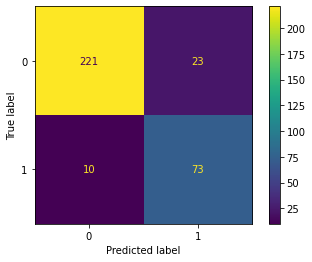

In [220]:
pred00split = r00_split.predict(X_test)
pred00split = list(map(round,pred00split))
print('\nTest accuracy : \n', accuracy_score(y_test, pred00split))
cm00split = confusion_matrix(y_test, pred00split) 
print ('\nConfusion Matrix : \n', cm00split) 
cm00split_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm00split)
cm00split_display.plot()

In [221]:
acc_ols_sp = metrics.accuracy_score(y_test, pred00split)
print('accuracy', acc_ols_sp)

pre_ols_sp = metrics.precision_score(y_test, pred00split, average = None)
print('precision', pre_ols_sp)

senrec_ols_sp = metrics.recall_score(y_test, pred00split, average = None)
print('sensitivity recall', senrec_ols_sp)

f1_ols_sp = metrics.f1_score(y_test, pred00split, average = None)
print('f1 score', f1_ols_sp)

pre_ols_sp_m = np.mean(pre_ols_sp)
senrec_ols_sp_m = np.mean(senrec_ols_sp)
f1_ols_sp_m = np.mean(f1_ols_sp)
print('mean precision', pre_ols_sp_m)
print('mean recall', senrec_ols_sp_m)
print('mean f1 score', f1_ols_sp_m)

accuracy 0.8990825688073395
precision [0.95670996 0.76041667]
sensitivity recall [0.9057377  0.87951807]
f1 score [0.93052632 0.81564246]
mean precision 0.8585633116883117
mean recall 0.8926278886035947
mean f1 score 0.8730843869450162


## Logistic regression

### Without data splitting

In [222]:

# Without constant
# m00_log = sm.Logit(y, x)
# r00_log = m00_log.fit_regularized()
# r00_log.summary()

# Add constant
x_const = tools.add_constant(x)
m00_log = sm.Logit(y,x_const, max_iter = 500)
r00_log = m00_log.fit(method='bfgs')
# r00_log = m00_log.fit()

r00_log.summary()

         Current function value: 0.180108
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


E:\Anaconda\Anaconda_file\lib\site-packages\statsmodels\base\model.py:130: ValueWarning: unknown kwargs ['max_iter']
  warnings.warn(msg, ValueWarning)
E:\Anaconda\Anaconda_file\lib\site-packages\scipy\optimize\_optimize.py:1360: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_bfgs(f, x0, args, fprime, callback=callback, **opts)
E:\Anaconda\Anaconda_file\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
E:\Anaconda\Anaconda_file\lib\site-packages\statsmodels\base\model.py:130: ValueWarning: unknown kwargs ['max_iter']
  warnings.warn(msg, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    acp   No. Observations:                 1087
Model:                          Logit   Df Residuals:                     1027
Method:                           MLE   Df Model:                           59
Date:                Tue, 21 Jan 2025   Pseudo R-squ.:                  0.6919
Time:                        16:18:43   Log-Likelihood:                -195.78
converged:                      False   LL-Null:                       -635.50
Covariance Type:            nonrobust   LLR p-value:                1.506e-146
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -1.3545      0.873     -1.552      0.121      -3.065       0.356
cp               -0.3599      0.151     -2.382      0.017      -0.656      -0.064
ie               -0.4119      0.334     -1.234      0.217      -1.066       0.242
mew               3.3441      0.541      6.187      0.000       2.285       4.403
meg               0.0372      0.604      0.062      0.951      -1.148       1.222
megmax           -0.3757      0.618     -0.608      0.543      -1.586       0.835
dbusl             0.4752      0.387      1.228      0.219      -0.283       1.233
dtraml           -0.4138      0.426     -0.970      0.332      -1.250       0.422
dtrainl           0.2447      0.494      0.495      0.620      -0.723       1.213
dplight          -0.8002      0.597     -1.341      0.180      -1.969       0.369
dstation         -0.7936      0.645     -1.230      0.219      -2.059       0.471
dparkcar          0.1307      0.497      0.263      0.793      -0.844       1.105
dparktw          -0.8583      0.550     -1.561      0.118      -1.936       0.219
dpedcro          -1.5298      0.519     -2.948      0.003      -2.547      -0.513
dstopsign        -0.0085      0.603     -0.014      0.989      -1.191       1.174
dtrafficarea     -0.3390      0.310     -1.092      0.275      -0.947       0.269
droad             2.6547      0.247     10.729      0.000       2.170       3.140
gvm_dwv           0.5696      0.427      1.335      0.182      -0.267       1.406
speedlimit       -0.9702      0.438     -2.217      0.027      -1.828      -0.112
bicyclecount      6.6031      0.802      8.231      0.000       5.031       8.175
carcount          0.1256      0.434      0.290      0.772      -0.724       0.976
z_qnr_1           0.2047      1.246      0.164      0.870      -2.238       2.648
z_qnr_2          -0.3246      1.365     -0.238      0.812      -2.999       2.350
z_qnr_3           0.5312      1.185      0.448      0.654      -1.791       2.853
z_qnr_4           0.4606      0.869      0.530      0.596      -1.243       2.164
z_qnr_6           0.2948      0.714      0.413      0.680      -1.105       1.694
z_qnr_7          -0.7600      1.014     -0.749      0.454      -2.748       1.228
z_qnr_9           0.4086      0.790      0.517      0.605      -1.139       1.956
z_qnr_11         -1.0334      0.820     -1.260      0.208      -2.641       0.574
z_qnr_12          1.3410      0.720      1.863      0.062      -0.070       2.752
z_qnr_13          1.4306      0.930      1.538      0.124      -0.392       3.253
z_qnr_14         -0.2147      1.878     -0.114      0.909      -3.895       3.466
z_qnr_17          0.1759      0.927      0.190      0.850      -1.641       1.993
z_qnr_21          0.7532      1.157      0.651      0.515      -1.514       3.021
z_qnr_22         -0.4544      1.178     -0.386      0.700      -2.763       1.854
z_qnr_23         -0.2343      1.025     -0.229      0.819      -2.243       1.774
z_qnr_24         -0.0739      1.477     -0.

In [223]:
print(r00_log.prsquared)
printsigcoef(r00_log)

0.6919303896160163
        feature             0  sig      coef
0            cp  1.721869e-02    * -0.359925
1           mew  6.142923e-10  ***  3.344072
2       dpedcro  3.195919e-03   ** -1.529811
3         droad  7.433117e-27  ***  2.654718
4    speedlimit  2.665487e-02    * -0.970202
5  bicyclecount  1.864250e-16  ***  6.603057
6      z_knr_10  5.217215e-03   ** -2.118233


,feature,0,sig,coef
0,cp,1.721869e-02,*,-0.359925
1,mew,6.142923e-10,***,3.344072
2,dpedcro,3.195919e-03,**,-1.529811
3,droad,7.433117e-27,***,2.654718
4,speedlimit,2.665487e-02,*,-0.970202
5,bicyclecount,1.864250e-16,***,6.603057
6,z_knr_10,5.217215e-03,**,-2.118233


0.9153633854645814

Test accuracy : 
 0.9153633854645814

Confusion Matrix : 
 [[740  52]
 [ 40 255]]
accuracy 0.9153633854645814
precision [0.94871795 0.83061889]
sensitivity recall [0.93434343 0.86440678]
f1 score [0.94147583 0.84717608]
mean precision 0.8896684206130461
mean recall 0.8993751070022257
mean f1 score 0.8943259533531147


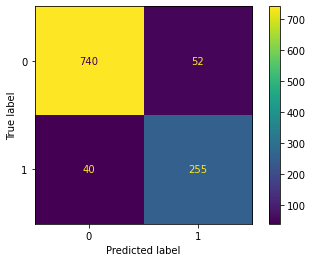

In [224]:
pred00log = r00_log.predict(x_const)
pred00log = list(map(round,pred00log))
print(accuracy_score(y, pred00log))
print('\nTest accuracy : \n', accuracy_score(y, pred00log))
cm00log = confusion_matrix(y, pred00log) 
print ('\nConfusion Matrix : \n', cm00log)
cm00log_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm00log)
cm00log_display.plot()

acc_log = metrics.accuracy_score(y, pred00log)
print('accuracy', acc_log)

pre_log = metrics.precision_score(y, pred00log, average = None)
print('precision', pre_log)

senrec_log = metrics.recall_score(y, pred00log, average = None)
print('sensitivity recall', senrec_log)

f1_log = metrics.f1_score(y, pred00log, average = None)
print('f1 score', f1_log)

pre_log_m = np.mean(pre_log)
senrec_log_m = np.mean(senrec_log)
f1_log_m = np.mean(f1_log)
print('mean precision', pre_log_m)
print('mean recall', senrec_log_m)
print('mean f1 score', f1_log_m)

### With data splitting

In [225]:

X_train1, X_test1, y_train1, y_test1 = train_test_split(
        x_const, y,
        test_size=0.25,
        random_state=7)
m00_log_split = sm.Logit(y_train1,X_train1, max_iter = 10000)
r00_log_split = m00_log_split.fit(method='bfgs')
r00_log_split.summary()

         Current function value: 0.180353
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


E:\Anaconda\Anaconda_file\lib\site-packages\statsmodels\base\model.py:130: ValueWarning: unknown kwargs ['max_iter']
  warnings.warn(msg, ValueWarning)
E:\Anaconda\Anaconda_file\lib\site-packages\scipy\optimize\_optimize.py:1360: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_bfgs(f, x0, args, fprime, callback=callback, **opts)
E:\Anaconda\Anaconda_file\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
E:\Anaconda\Anaconda_file\lib\site-packages\statsmodels\base\model.py:130: ValueWarning: unknown kwargs ['max_iter']
  warnings.warn(msg, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    acp   No. Observations:                  815
Model:                          Logit   Df Residuals:                      755
Method:                           MLE   Df Model:                           59
Date:                Tue, 21 Jan 2025   Pseudo R-squ.:                  0.6927
Time:                        16:18:45   Log-Likelihood:                -146.99
converged:                      False   LL-Null:                       -478.26
Covariance Type:            nonrobust   LLR p-value:                6.024e-103
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -1.3522      0.996     -1.358      0.175      -3.304       0.600
cp               -0.4999      0.186     -2.694      0.007      -0.864      -0.136
ie               -0.7676      0.398     -1.928      0.054      -1.548       0.013
mew               3.3811      0.620      5.453      0.000       2.166       4.596
meg              -0.1140      0.714     -0.160      0.873      -1.513       1.285
megmax           -0.1915      0.723     -0.265      0.791      -1.609       1.226
dbusl             0.7587      0.447      1.699      0.089      -0.117       1.634
dtraml           -0.3230      0.490     -0.660      0.509      -1.283       0.637
dtrainl           0.4419      0.590      0.749      0.454      -0.715       1.599
dplight          -1.0666      0.730     -1.461      0.144      -2.498       0.364
dstation         -1.2231      0.787     -1.554      0.120      -2.766       0.320
dparkcar          0.2473      0.578      0.428      0.669      -0.885       1.380
dparktw          -0.6935      0.627     -1.107      0.268      -1.921       0.534
dpedcro          -1.5902      0.614     -2.591      0.010      -2.793      -0.387
dstopsign        -0.1695      0.712     -0.238      0.812      -1.564       1.226
dtrafficarea     -0.4776      0.379     -1.259      0.208      -1.221       0.266
droad             2.6411      0.291      9.084      0.000       2.071       3.211
gvm_dwv           0.5029      0.492      1.022      0.307      -0.462       1.468
speedlimit       -1.0279      0.508     -2.024      0.043      -2.023      -0.032
bicyclecount      6.4708      0.928      6.971      0.000       4.652       8.290
carcount         -0.1191      0.522     -0.228      0.819      -1.142       0.904
z_qnr_1           0.4594      1.725      0.266      0.790      -2.922       3.841
z_qnr_2          -0.3006      1.624     -0.185      0.853      -3.484       2.883
z_qnr_3           0.2234      1.450      0.154      0.878      -2.619       3.066
z_qnr_4           0.1097      1.044      0.105      0.916      -1.937       2.156
z_qnr_6           0.6230      0.858      0.726      0.468      -1.058       2.304
z_qnr_7          -0.9153      1.133     -0.808      0.419      -3.136       1.306
z_qnr_9           0.1162      0.860      0.135      0.893      -1.570       1.802
z_qnr_11         -0.9404      0.885     -1.063      0.288      -2.674       0.794
z_qnr_12          0.6326      0.842      0.751      0.452      -1.017       2.282
z_qnr_13          1.2545      1.124      1.116      0.264      -0.948       3.457
z_qnr_14         -0.0875      2.079     -0.042      0.966      -4.163       3.988
z_qnr_17          0.0479      1.231      0.039      0.969      -2.366       2.462
z_qnr_21          0.4054      1.304      0.311      0.756      -2.151       2.962
z_qnr_22         -0.4226      1.402     -0.301      0.763      -3.170       2.325
z_qnr_23         -0.2722      1.151     -0.237      0.813      -2.527       1.983
z_qnr_24          0.0144      1.526      0.

In [226]:
print(r00_log_split.prsquared)
printsigcoef(r00_log_split)

0.6926630554838644
        feature             0  sig      coef
0            cp  7.063705e-03   ** -0.499943
1           mew  4.964937e-08  ***  3.381051
2       dpedcro  9.570910e-03   ** -1.590233
3         droad  1.046381e-19  ***  2.641091
4    speedlimit  4.300396e-02    * -1.027878
5  bicyclecount  3.140563e-12  ***  6.470792
6      z_knr_10  3.316229e-02    * -1.887979
7     r_width_1  4.110672e-02    *  1.193832


,feature,0,sig,coef
0,cp,7.063705e-03,**,-0.499943
1,mew,4.964937e-08,***,3.381051
2,dpedcro,9.570910e-03,**,-1.590233
3,droad,1.046381e-19,***,2.641091
4,speedlimit,4.300396e-02,*,-1.027878
5,bicyclecount,3.140563e-12,***,6.470792
6,z_knr_10,3.316229e-02,*,-1.887979
7,r_width_1,4.110672e-02,*,1.193832


0.8970588235294118

Test accuracy : 
 0.8970588235294118

Confusion Matrix : 
 [[187  13]
 [ 15  57]]
accuracy 0.8970588235294118
precision [0.92574257 0.81428571]
sensitivity recall [0.935      0.79166667]
f1 score [0.93034826 0.8028169 ]
mean precision 0.8700141442715701
mean recall 0.8633333333333333
mean f1 score 0.8665825800574591


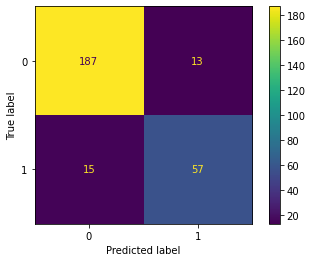

In [227]:
pred00log_split = r00_log_split.predict(X_test1)
pred00log_split = list(map(round,pred00log_split))
print(accuracy_score(y_test1, pred00log_split))
print('\nTest accuracy : \n', accuracy_score(y_test1, pred00log_split))
cm00log_split = confusion_matrix(y_test1, pred00log_split) 
print ('\nConfusion Matrix : \n', cm00log_split)
cm00log_split_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm00log_split)
cm00log_split_display.plot()

acc_log_split = metrics.accuracy_score(y_test1, pred00log_split)
print('accuracy', acc_log_split)

pre_log_split = metrics.precision_score(y_test1, pred00log_split, average = None)
print('precision', pre_log_split)

senrec_log_split = metrics.recall_score(y_test1, pred00log_split, average = None)
print('sensitivity recall', senrec_log_split)

f1_log_split = metrics.f1_score(y_test1, pred00log_split, average = None)
print('f1 score', f1_log_split)

pre_log_split_m = np.mean(pre_log_split)
senrec_log_split_m = np.mean(senrec_log_split)
f1_log_split_m = np.mean(f1_log_split)
print('mean precision', pre_log_split_m)
print('mean recall', senrec_log_split_m)
print('mean f1 score', f1_log_split_m)

# Step wise feature selection

In [150]:
# Check sklearn metrics name for feature selection
# sklearn.metrics.get_scorer_names()

## Ordinary Least Squares Regression model

### Sequential forward floating selection

In [151]:
# def fs_output_sum(type, cv_start, cv_end, cv_step, x, y):
#     pa1 = ['neg_mean_squared_error', 
#            'r2',
#            'neg_median_absolute_error',
#            'neg_mean_absolute_error']
#     pa2 = ['accuracy',
#            'f1',
#            'precision',
#            'recall']
#     if type == 'linear':
#         sel_cols_f = pd.DataFrame()
#         sel_cols_b = pd.DataFrame()
#         for p in range(0,3):
#             for i in range(cv_start, cv_end, cv_step):
#                 sffslin = featureselection_lin(True, pa1[p], i, x, y)
#                 sbfslin = featureselection_lin(False, pa1[p], i, x, y)
#                 sel_cols_f[pa1[p]] = list(sffslin.k_feature_names_)
#                 sel_cols_b[pa1[p]] = list(sbfslin.k_feature_names_)
#     elif type == 'logistic':
#         sel_cols_f = pd.DataFrame()
#         sel_cols_b = pd.DataFrame()
#         for q in range(0,3):
#             for t in range(cv_start, cv_end, cv_step):
#                 sffslog = featureselection_log(True, pa2[q], t, x, y)
#                 sbfslog = featureselection_log(False, pa2[q], t, x, y)
#                 sel_cols_f[pa2[q]] = list(sffslog.k_feature_names_)
#                 sel_cols_b[pa2[q]] = list(sbfslog.k_feature_names_)
#     else:
#         print('Error, invalid input!')
#     return sel_cols_f, sel_cols_b


In [152]:
# # n = best, linear regression, scoring = neg_mean_squared_error, cv = 5
sffslin0 = featureselection_lin(True, 'neg_mean_squared_error', 5, x, y) 
print(sffslin0.k_feature_names_)
print(len(sffslin0.k_feature_names_))
print(sffslin0.k_score_)


('cp', 'mew', 'dtraml', 'dtrainl', 'dstation', 'dparkcar', 'dpedcro', 'dtrafficarea', 'droad', 'speedlimit', 'bicyclecount', 'z_qnr_11', 'z_qnr_13', 'z_qnr_14', 'z_qnr_32', 'z_qnr_33', 'z_knr_2', 'z_knr_10', 'trafficarea_2', 'speedlimit_2')
20
-0.15689942143068442


In [153]:
# # # n = best, linear regression, scoring = neg_mean_squared_error, cv = 10
# sffslin1 = featureselection_lin(True, 'neg_mean_squared_error', 10, x, y) 
# print(sffslin1.k_feature_names_)
# print(len(sffslin1.k_feature_names_))
# print(sffslin1.k_score_)


In [154]:
# # n = best, linear regression, scoring = r2, cv = 5
sffslin2 = featureselection_lin(True, 'r2', 5, x, y) 
print(sffslin2.k_feature_names_)
print(len(sffslin2.k_feature_names_))
print(sffslin2.k_score_)

('cmin', 'ie', 'mew', 'megmax', 'dbusl', 'dtraml', 'dparkcar', 'dparktw', 'dpedcro', 'dtrafficarea', 'droad', 'speedlimit', 'bicyclecount', 'z_qnr_1', 'z_qnr_4', 'z_qnr_6', 'z_qnr_9', 'z_qnr_11', 'z_qnr_12', 'z_qnr_13', 'z_qnr_17', 'z_qnr_21', 'z_qnr_23', 'z_qnr_24', 'z_qnr_28', 'z_qnr_32', 'z_knr_3', 'z_knr_7', 'trafficarea_1', 'trafficarea_2', 'r_width_1', 'r_width_6', 'speedlimit_2')
33
0.12423031660044545


In [155]:
# # n = best, linear regression, scoring = r2, cv = 10
# sffslin3 = featureselection_lin(True, 'r2', 10, x, y) 
# print(sffslin3.k_feature_names_)
# print(len(sffslin3.k_feature_names_))
# print(sffslin3.k_score_)

In [156]:
# # # n = best, linear regression, scoring = neg median absolute error, cv = 5
sffslin4 = featureselection_lin(True, 'neg_median_absolute_error', 5, x, y) 
print(sffslin4.k_feature_names_)
print(len(sffslin4.k_feature_names_))
print(sffslin4.k_score_)

('cmin', 'droad', 'z_qnr_6', 'z_qnr_12', 'trafficarea_1', 'r_width_3', 'speedlimit_6')
7
-0.18883018837512483


In [157]:
# # # # n = best, linear regression, scoring = neg median absolute error, cv = 10
# sffslin5 = featureselection_lin(True, 'neg_median_absolute_error', 10, x, y) 
# print(sffslin5.k_feature_names_)
# print(len(sffslin5.k_feature_names_))
# print(sffslin5.k_score_)

In [158]:
# # # n = best, linear regression, scoring = neg mean absolute error, cv = 5
sffslin6 = featureselection_lin(True, 'neg_mean_absolute_error', 5, x, y) 
print(sffslin6.k_feature_names_)
print(len(sffslin6.k_feature_names_))
print(sffslin6.k_score_)

('cp', 'mew', 'dtraml', 'dtrainl', 'dstation', 'dparkcar', 'dstopsign', 'dtrafficarea', 'droad', 'bicyclecount', 'z_qnr_1', 'z_qnr_6', 'z_qnr_11', 'z_qnr_13', 'z_qnr_14', 'z_qnr_17', 'z_knr_10', 'trafficarea_2', 'r_width_1', 'speedlimit_2', 'speedlimit_5', 'speedlimit_6')
22
-0.3175896853490701


In [159]:
# # # # n = best, linear regression, scoring = neg mean absolute error, cv = 10
# sffslin7 = featureselection_lin(True, 'neg_mean_absolute_error', 10, x, y) 
# print(sffslin7.k_feature_names_)
# print(len(sffslin7.k_feature_names_))
# print(sffslin7.k_score_)

In [161]:
selected_columns_linr_sffs = []
selected_columns_linr_sffs = {'nmse_cv5':list(sffslin0.k_feature_names_), 
#                               'nmse_cv10':list(sffslin1.k_feature_names_), 
                              'r2_cv5':list(sffslin2.k_feature_names_), 
#                               'r2_cv10':list(sffslin3.k_feature_names_), 
                              'nmedae_cv5':list(sffslin4.k_feature_names_), 
#                               'nmedae_cv10':list(sffslin5.k_feature_names_), 
                              'nmeae_cv5':list(sffslin6.k_feature_names_) 
#                               'nmeae_cv10':list(sffslin7.k_feature_names_)
                             }

In [162]:
df_sf_linr_sffs = pd.DataFrame(dict([(k,pd.Series(v)) for k,v in selected_columns_linr_sffs.items()]))

In [163]:
# df_sf_linr_sffs.to_csv('/home/yelhe/script/mtp/tables/updated_sffs_linearreg.csv', index = True)

In [317]:
lin_sffs = []

In [332]:
# 0 2 4 6
selected_columns = list(sffslin6.k_feature_names_)
selected_columns

['cp',
 'mew',
 'dtraml',
 'dtrainl',
 'dstation',
 'dparkcar',
 'dstopsign',
 'dtrafficarea',
 'droad',
 'bicyclecount',
 'z_qnr_1',
 'z_qnr_6',
 'z_qnr_11',
 'z_qnr_13',
 'z_qnr_14',
 'z_qnr_17',
 'z_knr_10',
 'trafficarea_2',
 'r_width_1',
 'speedlimit_2',
 'speedlimit_5',
 'speedlimit_6']

In [333]:
# OLS
xs = dfacrpv[selected_columns]
x_const_s = tools.add_constant(xs)
X_train, X_test, y_train, y_test = train_test_split(
        x_const_s, y,
        test_size=0.4,
        random_state=3)

m0 = sm.OLS(y_train, X_train)
r0 = m0.fit()
r0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    acp   R-squared:                       0.548
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     34.67
Date:                Mon, 20 Jan 2025   Prob (F-statistic):           2.63e-93
Time:                        16:34:09   Log-Likelihood:                -125.76
No. Observations:                 652   AIC:                             297.5
Df Residuals:                     629   BIC:                             400.6
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.4380      0.045      9.628      0.000       0.349       0.527
cp               -0.0350      0.012     -2.807      0.005      -0.059      -0.011
mew               0.2780      0.042      6.577      0.000       0.195       0.361
dtraml           -0.0884      0.028     -3.187      0.002      -0.143      -0.034
dtrainl          -0.0669      0.036     -1.862      0.063      -0.137       0.004
dstation         -0.1103      0.047     -2.335      0.020      -0.203      -0.018
dparkcar          0.0650      0.036      1.802      0.072      -0.006       0.136
dstopsign         0.0760      0.041      1.863      0.063      -0.004       0.156
dtrafficarea     -0.0458      0.022     -2.088      0.037      -0.089      -0.003
droad             0.2512      0.018     13.687      0.000       0.215       0.287
bicyclecount      0.2634      0.023     11.219      0.000       0.217       0.309
z_qnr_1           0.1416      0.085      1.669      0.096      -0.025       0.308
z_qnr_6           0.2252      0.062      3.631      0.000       0.103       0.347
z_qnr_11         -0.2000      0.080     -2.488      0.013      -0.358      -0.042
z_qnr_13          0.2637      0.080      3.316      0.001       0.108       0.420
z_qnr_14         -0.1488      0.115     -1.293      0.197      -0.375       0.077
z_qnr_17          0.0740      0.051      1.452      0.147      -0.026       0.174
z_knr_10         -0.1505      0.045     -3.331      0.001      -0.239      -0.062
trafficarea_2    -0.0782      0.045     -1.733      0.084      -0.167       0.010
r_width_1        -0.0240      0.044     -0.540      0.589      -0.111       0.063
speedlimit_2     -0.0825      0.086     -0.962      0.336      -0.251       0.086
speedlimit_5     -0.0329      0.106     -0.311      0.756      -0.241       0.175
speedlimit_6     -0.0886      0.147     -0.605      0.546      -0.377       0.199
==============================================================================
Omnibus:                        0.098   Durbin-Watson:                   1.929
Prob(Omnibus):                  0.952   Jarque-Bera (JB):                0.076
Skew:                          -0.027   Prob(JB):                        0.963
Kurtosis:                       3.001   Cond. No.                         19.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [334]:
lin_sffs.append(r0.rsquared_adj)

In [335]:
lin_sffs

[0.5301587542402446,
 0.5391296879635421,
 0.3566254563007396,
 0.5322317953757842]

In [336]:
printsigcoef(r0)

         feature             0  sig      coef
0          const  1.465024e-20  ***  0.438050
1             cp  5.150481e-03   ** -0.034952
2            mew  1.010659e-10  ***  0.277993
3         dtraml  1.510815e-03   ** -0.088366
4       dstation  1.987754e-02    * -0.110281
5   dtrafficarea  3.720523e-02    * -0.045809
6          droad  1.638810e-37  ***  0.251185
7   bicyclecount  9.421890e-27  ***  0.263355
8        z_qnr_6  3.057846e-04  ***  0.225180
9       z_qnr_11  1.309003e-02    * -0.200030
10      z_qnr_13  9.647973e-04  ***  0.263712
11      z_knr_10  9.166130e-04  *** -0.150509


,feature,0,sig,coef
0,const,1.465024e-20,***,0.438050
1,cp,5.150481e-03,**,-0.034952
2,mew,1.010659e-10,***,0.277993
3,dtraml,1.510815e-03,**,-0.088366
4,dstation,1.987754e-02,*,-0.110281
5,dtrafficarea,3.720523e-02,*,-0.045809
6,droad,1.638810e-37,***,0.251185
7,bicyclecount,9.421890e-27,***,0.263355
8,z_qnr_6,3.057846e-04,***,0.225180
9,z_qnr_11,1.309003e-02,*,-0.200030


### Sequential backward floating selection

In [185]:
# # n = best, linear regression, backward, scoring = neg_mean_squared_error, cv = 5
sbfslin0 = featureselection_lin(False, 'neg_mean_squared_error', 5, x, y) 
print(sbfslin0.k_feature_names_)
print(len(sbfslin0.k_feature_names_))
print(sbfslin0.k_score_)

('cp', 'mew', 'dtraml', 'dtrainl', 'dstation', 'dparkcar', 'dpedcro', 'dtrafficarea', 'droad', 'speedlimit', 'bicyclecount', 'z_qnr_11', 'z_qnr_13', 'z_qnr_14', 'z_qnr_32', 'z_qnr_33', 'z_knr_2', 'z_knr_10', 'trafficarea_2', 'speedlimit_2')
20
-0.15689942143068442


In [186]:
# # # n = best, linear regression, backward, scoring = neg_mean_squared_error, cv = 10
# sbfslin1 = featureselection_lin(False, 'neg_mean_squared_error', 10, x, y) 
# print(sbfslin1.k_feature_names_)
# print(len(sbfslin1.k_feature_names_))
# print(sbfslin1.k_score_)


In [187]:
# # n = best, linear regression, backward, scoring = r2, cv = 5
sbfslin2 = featureselection_lin(False, 'r2', 5, x, y) 
print(sbfslin2.k_feature_names_)
print(len(sbfslin2.k_feature_names_))
print(sbfslin2.k_score_)

('cmin', 'ie', 'mew', 'megmax', 'dbusl', 'dtraml', 'dparkcar', 'dparktw', 'dpedcro', 'dtrafficarea', 'droad', 'speedlimit', 'bicyclecount', 'z_qnr_1', 'z_qnr_4', 'z_qnr_6', 'z_qnr_9', 'z_qnr_11', 'z_qnr_12', 'z_qnr_13', 'z_qnr_17', 'z_qnr_21', 'z_qnr_23', 'z_qnr_24', 'z_qnr_28', 'z_qnr_32', 'z_knr_3', 'z_knr_7', 'trafficarea_1', 'trafficarea_2', 'r_width_1', 'r_width_6', 'speedlimit_2')
33
0.12423031660044545


In [188]:
# # # n = best, linear regression, backward, scoring = r2, cv = 10
# sbfslin3 = featureselection_lin(False, 'r2', 10, x, y) 
# print(sbfslin3.k_feature_names_)
# print(len(sbfslin3.k_feature_names_))
# print(sbfslin3.k_score_)

In [189]:
# # n = best, linear regression, backward, scoring = neg median aboslute error, cv = 5
sbfslin4 = featureselection_lin(False, 'neg_median_absolute_error', 5, x, y) 
print(sbfslin4.k_feature_names_)
print(len(sbfslin4.k_feature_names_))
print(sbfslin4.k_score_)

('droad', 'gvm_dwv', 'z_qnr_4', 'z_qnr_6', 'z_qnr_9', 'z_qnr_13', 'z_qnr_25', 'trafficarea_1', 'trafficarea_2', 'speedlimit_6')
10
-0.18880865864262572


In [190]:
# # # n = best, linear regression, backward, scoring = neg median aboslute error, cv = 10
# sbfslin5 = featureselection_lin(False, 'neg_median_absolute_error', 10, x, y) 
# print(sbfslin5.k_feature_names_)
# print(len(sbfslin5.k_feature_names_))
# print(sbfslin5.k_score_)

In [191]:
# # n = best, linear regression, backward, scoring = neg mean absolute error, cv = 5
sbfslin6 = featureselection_lin(False, 'neg_mean_absolute_error', 5, x, y) 
print(sbfslin6.k_feature_names_)
print(len(sbfslin6.k_feature_names_))
print(sbfslin6.k_score_)

('cp', 'mew', 'dtraml', 'dtrainl', 'dstation', 'dparkcar', 'dstopsign', 'dtrafficarea', 'droad', 'bicyclecount', 'z_qnr_1', 'z_qnr_6', 'z_qnr_11', 'z_qnr_13', 'z_qnr_14', 'z_qnr_17', 'z_knr_10', 'trafficarea_2', 'r_width_1', 'speedlimit_2', 'speedlimit_5', 'speedlimit_6')
22
-0.3175896853490701


In [192]:
# # # n = best, linear regression, backward, scoring = neg mean aboslute error, cv = 10
# sbfslin7 = featureselection_lin(False, 'neg_mean_absolute_error', 10, x, y) 
# print(sbfslin7.k_feature_names_)
# print(len(sbfslin7.k_feature_names_))
# print(sbfslin7.k_score_)

In [193]:
selected_columns_linr_sbfs = []
selected_columns_linr_sbfs = {'nmse_cv5':list(sbfslin0.k_feature_names_), 
#                               'nmse_cv10':list(sbfslin1.k_feature_names_), 
                              'r2_cv5':list(sbfslin2.k_feature_names_), 
#                               'r2_cv10':list(sbfslin3.k_feature_names_), 
                              'nmedae_cv5':list(sbfslin4.k_feature_names_), 
#                               'nmedae_cv10':list(sbfslin5.k_feature_names_),
                              'nmeae_cv5':list(sbfslin6.k_feature_names_)
#                               , 'nmeae_cv10':list(sbfslin7.k_feature_names_)
                             }

In [194]:
df_sf_linr_sbfs = pd.DataFrame(dict([(k,pd.Series(v)) for k,v in selected_columns_linr_sbfs.items()]))

In [195]:
# df_sf_linr_sbfs.to_csv('/home/yelhe/script/mtp/tables/updated_sbfs_linearreg.csv', index = True)

In [ ]:
# df_output = pd.read_csv('/home/yelhe/script/mtp/tables/updated_sbfs_linearreg.csv')

In [337]:
lin_sbfs = []

In [354]:
# 0 2 4 6
selected_columns = list(sbfslin6.k_feature_names_)
selected_columns

['cp',
 'mew',
 'dtraml',
 'dtrainl',
 'dstation',
 'dparkcar',
 'dstopsign',
 'dtrafficarea',
 'droad',
 'bicyclecount',
 'z_qnr_1',
 'z_qnr_6',
 'z_qnr_11',
 'z_qnr_13',
 'z_qnr_14',
 'z_qnr_17',
 'z_knr_10',
 'trafficarea_2',
 'r_width_1',
 'speedlimit_2',
 'speedlimit_5',
 'speedlimit_6']

In [355]:
# OLS
xs = dfacrpv[selected_columns]
x_const_s = tools.add_constant(xs)
X_train, X_test, y_train, y_test = train_test_split(
        x_const_s, y,
        test_size=0.4,
        random_state=3)

m1 = sm.OLS(y_train, X_train)
r1 = m1.fit()
r1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    acp   R-squared:                       0.548
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     34.67
Date:                Mon, 20 Jan 2025   Prob (F-statistic):           2.63e-93
Time:                        16:37:42   Log-Likelihood:                -125.76
No. Observations:                 652   AIC:                             297.5
Df Residuals:                     629   BIC:                             400.6
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.4380      0.045      9.628      0.000       0.349       0.527
cp               -0.0350      0.012     -2.807      0.005      -0.059      -0.011
mew               0.2780      0.042      6.577      0.000       0.195       0.361
dtraml           -0.0884      0.028     -3.187      0.002      -0.143      -0.034
dtrainl          -0.0669      0.036     -1.862      0.063      -0.137       0.004
dstation         -0.1103      0.047     -2.335      0.020      -0.203      -0.018
dparkcar          0.0650      0.036      1.802      0.072      -0.006       0.136
dstopsign         0.0760      0.041      1.863      0.063      -0.004       0.156
dtrafficarea     -0.0458      0.022     -2.088      0.037      -0.089      -0.003
droad             0.2512      0.018     13.687      0.000       0.215       0.287
bicyclecount      0.2634      0.023     11.219      0.000       0.217       0.309
z_qnr_1           0.1416      0.085      1.669      0.096      -0.025       0.308
z_qnr_6           0.2252      0.062      3.631      0.000       0.103       0.347
z_qnr_11         -0.2000      0.080     -2.488      0.013      -0.358      -0.042
z_qnr_13          0.2637      0.080      3.316      0.001       0.108       0.420
z_qnr_14         -0.1488      0.115     -1.293      0.197      -0.375       0.077
z_qnr_17          0.0740      0.051      1.452      0.147      -0.026       0.174
z_knr_10         -0.1505      0.045     -3.331      0.001      -0.239      -0.062
trafficarea_2    -0.0782      0.045     -1.733      0.084      -0.167       0.010
r_width_1        -0.0240      0.044     -0.540      0.589      -0.111       0.063
speedlimit_2     -0.0825      0.086     -0.962      0.336      -0.251       0.086
speedlimit_5     -0.0329      0.106     -0.311      0.756      -0.241       0.175
speedlimit_6     -0.0886      0.147     -0.605      0.546      -0.377       0.199
==============================================================================
Omnibus:                        0.098   Durbin-Watson:                   1.929
Prob(Omnibus):                  0.952   Jarque-Bera (JB):                0.076
Skew:                          -0.027   Prob(JB):                        0.963
Kurtosis:                       3.001   Cond. No.                         19.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [356]:
lin_sbfs.append(r1.rsquared_adj)
lin_sbfs

[0.5301587542402446,
 0.5391296879635421,
 0.35918647559977834,
 0.5322317953757842]

In [357]:
printsigcoef(r1)

         feature             0  sig      coef
0          const  1.465024e-20  ***  0.438050
1             cp  5.150481e-03   ** -0.034952
2            mew  1.010659e-10  ***  0.277993
3         dtraml  1.510815e-03   ** -0.088366
4       dstation  1.987754e-02    * -0.110281
5   dtrafficarea  3.720523e-02    * -0.045809
6          droad  1.638810e-37  ***  0.251185
7   bicyclecount  9.421890e-27  ***  0.263355
8        z_qnr_6  3.057846e-04  ***  0.225180
9       z_qnr_11  1.309003e-02    * -0.200030
10      z_qnr_13  9.647973e-04  ***  0.263712
11      z_knr_10  9.166130e-04  *** -0.150509


,feature,0,sig,coef
0,const,1.465024e-20,***,0.438050
1,cp,5.150481e-03,**,-0.034952
2,mew,1.010659e-10,***,0.277993
3,dtraml,1.510815e-03,**,-0.088366
4,dstation,1.987754e-02,*,-0.110281
5,dtrafficarea,3.720523e-02,*,-0.045809
6,droad,1.638810e-37,***,0.251185
7,bicyclecount,9.421890e-27,***,0.263355
8,z_qnr_6,3.057846e-04,***,0.225180
9,z_qnr_11,1.309003e-02,*,-0.200030


## Logistic Regression model

### Sequential forward floating selection

In [213]:
# # n = best, logistic regression, scoring = accuracy, cv = 5
sffslog0 = featureselection_log(True, 'accuracy', 5, x, y)
print(sffslog0.k_feature_names_)
print(len(sffslog0.k_feature_names_))
print(sffslog0.k_score_)

('mew', 'dstation', 'dparkcar', 'dtrafficarea', 'droad', 'bicyclecount', 'z_qnr_4', 'z_qnr_7', 'z_qnr_12', 'z_qnr_13', 'z_qnr_14', 'z_qnr_21', 'z_qnr_22', 'z_qnr_24', 'z_qnr_25', 'z_qnr_33', 'z_knr_3', 'z_knr_9', 'z_knr_10', 'trafficarea_2', 'r_width_3', 'r_width_5', 'r_width_6')
23
0.910751278907538


In [214]:
# # n = best, logistic regression, scoring = accuracy, cv = 10
# sffslog1 = featureselection_log(True, 'accuracy', 10, x, y)
# print(sffslog1.k_feature_names_)
# print(len(sffslog1.k_feature_names_))
# print(sffslog1.k_score_)


In [215]:
# # n = best, logistic regression, scoring = f1, cv = 5
sffslog2 = featureselection_log(True, 'f1', 5, x, y)
print(sffslog2.k_feature_names_)
print(len(sffslog2.k_feature_names_))
print(sffslog2.k_score_)

('cp', 'cmin', 'mew', 'meg', 'megmax', 'dtraml', 'dplight', 'dstation', 'dparkcar', 'dparktw', 'dpedcro', 'droad', 'speedlimit', 'bicyclecount', 'carcount', 'z_qnr_3', 'z_qnr_4', 'z_qnr_11', 'z_qnr_12', 'z_qnr_13', 'z_qnr_14', 'z_qnr_22', 'z_qnr_24', 'z_qnr_25', 'z_qnr_26', 'z_qnr_28', 'z_qnr_32', 'z_qnr_33', 'z_knr_3', 'z_knr_9', 'z_knr_10', 'trafficarea_1', 'r_width_1', 'r_width_5', 'speedlimit_5', 'speedlimit_6')
36
0.8511642143304938


In [216]:
# # # n = best, logistic regression, scoring = f1, cv = 10
# sffslog3 = featureselection_log(True, 'f1', 10, x, y)
# print(sffslog3.k_feature_names_)
# print(len(sffslog3.k_feature_names_))
# print(sffslog3.k_score_)


In [217]:
# n = best, logistic regression, scoring = precision, cv = 5
sffslog4 = featureselection_log(True, 'precision', 5, x, y)
print(sffslog4.k_feature_names_)
print(len(sffslog4.k_feature_names_))
print(sffslog4.k_score_)


('carcount', 'z_qnr_6')
2
0.8454545454545455


In [218]:
# # # # n = best, logistic regression, scoring = precision, cv = 10
# sffslog5 = featureselection_log(True, 'precision', 10, x, y)
# print(sffslog5.k_feature_names_)
# print(len(sffslog5.k_feature_names_))
# print(sffslog5.k_score_)

In [219]:
# # n = best, logistic regression, scoring = recall, cv = 5
sffslog6 = featureselection_log(True, 'recall', 5, x, y)
print(sffslog6.k_feature_names_)
print(len(sffslog6.k_feature_names_))
print(sffslog6.k_score_)


('cmin', 'mew', 'dstation', 'dparkcar', 'droad', 'gvm_dwv', 'speedlimit', 'bicyclecount', 'carcount', 'z_qnr_3', 'z_qnr_4', 'z_qnr_7', 'z_qnr_9', 'z_qnr_14', 'z_qnr_22', 'z_qnr_25', 'z_qnr_28', 'z_qnr_33', 'z_knr_7', 'z_knr_10', 'trafficarea_2')
21
0.8711864406779661


In [220]:
# # # n = best, logistic regression, scoring = recall, cv = 10
# sffslog7 = featureselection_log(True, 'recall', 10, x, y)
# print(sffslog7.k_feature_names_)
# print(len(sffslog7.k_feature_names_))
# print(sffslog7.k_score_)


In [221]:
# For part 
selected_columns_logr_sffs = []
selected_columns_logr_sffs = {
                              'acc_cv5':list(sffslog0.k_feature_names_), 
#                               'acc_cv10':list(sffslog1.k_feature_names_), 
                              'f1_cv5':list(sffslog2.k_feature_names_), 
#                               'f1_cv10':list(sffslog3.k_feature_names_), 
                              'pre_cv5':list(sffslog4.k_feature_names_), 
#                               'pre_cv10':list(sffslog5.k_feature_names_),
                              'rec_cv5':list(sffslog6.k_feature_names_)
#     ,                           'rec_cv10':list(sffslog7.k_feature_names_)
                              }
df_sf_logr_sffs = pd.DataFrame(dict([(k,pd.Series(v)) for k,v in selected_columns_logr_sffs.items()]))
# df_sf_logr_sffs.to_csv('/home/yelhe/script/mtp/tables/vif_sffs_logisticreg.csv', index = True)

### Sequential backward floating selection

In [222]:
# n = best, logistic regression, scoring = accuracy, cv = 5
sbfslog0 = featureselection_log(False, 'accuracy', 5, x, y)
print(sbfslog0.k_feature_names_)
print(len(sbfslog0.k_feature_names_))
print(sbfslog0.k_score_)


('cp', 'ie', 'mew', 'dtraml', 'dplight', 'dstation', 'dparkcar', 'dparktw', 'dpedcro', 'droad', 'gvm_dwv', 'speedlimit', 'bicyclecount', 'z_qnr_4', 'z_qnr_11', 'z_qnr_13', 'z_qnr_22', 'z_qnr_24', 'z_qnr_25', 'z_knr_3', 'z_knr_10', 'trafficarea_1', 'r_width_1', 'r_width_3')
24
0.9199425020082019


In [223]:
# # n = best, logistic regression, scoring = accuracy, cv = 10
# sbfslog1 = featureselection_log(False, 'accuracy', 10, x, y)
# print(sbfslog1.k_feature_names_)
# print(len(sbfslog1.k_feature_names_))
# print(sbfslog1.k_score_)


In [224]:
# n = best, logistic regression, scoring = f1, cv = 5
sbfslog2 = featureselection_log(False, 'f1', 5, x, y)
print(sbfslog2.k_feature_names_)
print(len(sbfslog2.k_feature_names_))
print(sbfslog2.k_score_)

('cp', 'ie', 'mew', 'meg', 'megmax', 'dtraml', 'dparkcar', 'dparktw', 'dpedcro', 'droad', 'speedlimit', 'bicyclecount', 'z_qnr_4', 'z_qnr_7', 'z_qnr_11', 'z_qnr_12', 'z_qnr_13', 'z_qnr_21', 'z_qnr_25', 'z_knr_3', 'z_knr_9', 'z_knr_10', 'trafficarea_1', 'trafficarea_2', 'r_width_1', 'r_width_3')
26
0.8509500243920523


In [225]:
# # n = best, logistic regression, scoring = f1, cv = 10
# sbfslog3 = featureselection_log(False, 'f1', 10, x, y)
# print(sbfslog3.k_feature_names_)
# print(len(sbfslog3.k_feature_names_))
# print(sbfslog3.k_score_)

In [226]:
# n = best, logistic regression, scoring = precision, cv = 5
sbfslog4 = featureselection_log(False, 'precision', 5, x, y)
print(sbfslog4.k_feature_names_)
print(len(sbfslog4.k_feature_names_))
print(sbfslog4.k_score_)


('cp', 'ie', 'mew', 'dstation', 'dparktw', 'dpedcro', 'droad', 'gvm_dwv', 'speedlimit', 'bicyclecount', 'z_qnr_11', 'z_qnr_12', 'z_qnr_13', 'z_qnr_14', 'z_qnr_25', 'z_knr_10', 'trafficarea_1', 'r_width_1')
18
0.8417471264367815


In [227]:
# # n = best, logistic regression, scoring = precision, cv = 10
# sbfslog5 = featureselection_log(False, 'precision', 10, x, y)
# print(sbfslog5.k_feature_names_)
# print(len(sbfslog5.k_feature_names_))
# print(sbfslog5.k_score_)


In [228]:
# n = best, logistic regression, scoring = recall, cv = 5
sbfslog6 = featureselection_log(False, 'recall', 5, x, y)
print(sbfslog6.k_feature_names_)
print(len(sbfslog6.k_feature_names_))
print(sbfslog6.k_score_)

('cp', 'ie', 'mew', 'megmax', 'dtraml', 'dstation', 'dparkcar', 'dparktw', 'dpedcro', 'dtrafficarea', 'droad', 'gvm_dwv', 'speedlimit', 'bicyclecount', 'carcount', 'z_qnr_11', 'z_qnr_13', 'z_knr_3', 'z_knr_7', 'trafficarea_1', 'r_width_1', 'r_width_5')
22
0.8745762711864409


In [229]:
# # n = best, logistic regression, scoring = recall, cv = 10
# sbfslog7 = featureselection_log(False, 'recall', 10, x, y)
# print(sbfslog7.k_feature_names_)
# print(len(sbfslog7.k_feature_names_))
# print(sbfslog7.k_score_)

In [230]:
# For all 
selected_columns_logr_sbfs = []
selected_columns_logr_sbfs = {
                              'acc_cv5':list(sbfslog0.k_feature_names_), 
#                               'acc_cv10':list(sbfslog1.k_feature_names_),
                              'f1_cv5':list(sbfslog2.k_feature_names_), 
#                               'f1_cv10':list(sbfslog3.k_feature_names_),
                              'pre_cv5':list(sbfslog4.k_feature_names_), 
#                               'pre_cv10':list(sbfslog5.k_feature_names_),
                              'rec_cv5':list(sbfslog6.k_feature_names_) 
#                               ,'rec_cv10':list(sbfslog7.k_feature_names_)
                              }
df_sf_logr_sbfs = pd.DataFrame(dict([(k,pd.Series(v)) for k,v in selected_columns_logr_sbfs.items()]))
# df_sf_logr_sbfs.to_csv('/home/yelhe/script/mtp/tables/vif_sbfs_logisticreg.csv', index = True)

In [231]:
# df_output = pd.read_csv('/home/yelhe/script/mtp/tables/vif_sbfs_logisticreg.csv')

In [360]:
log_sffs = []
log_sbfs = []

In [373]:
# 0 2 4 6
selected_columns = list(sffslog6.k_feature_names_)
print(len(selected_columns))

21


In [374]:
# logit with splitting
xs = dfacrpv[selected_columns]
x_const_s = tools.add_constant(xs)
X_train, X_test, y_train, y_test = train_test_split(
        x_const_s, y,
        test_size=0.2,
        random_state=10)

m2 = sm.Logit(y_train, X_train, max_iter = 500)
r2 = m2.fit(method='bfgs')
r2.summary()

         Current function value: 0.230351
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


E:\Anaconda\Anaconda_file\lib\site-packages\statsmodels\base\model.py:130: ValueWarning: unknown kwargs ['max_iter']
  warnings.warn(msg, ValueWarning)
E:\Anaconda\Anaconda_file\lib\site-packages\scipy\optimize\_optimize.py:1360: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_bfgs(f, x0, args, fprime, callback=callback, **opts)
E:\Anaconda\Anaconda_file\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
E:\Anaconda\Anaconda_file\lib\site-packages\statsmodels\base\model.py:130: ValueWarning: unknown kwargs ['max_iter']
  warnings.warn(msg, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    acp   No. Observations:                  869
Model:                          Logit   Df Residuals:                      847
Method:                           MLE   Df Model:                           21
Date:                Mon, 20 Jan 2025   Pseudo R-squ.:                  0.6113
Time:                        16:41:16   Log-Likelihood:                -200.17
converged:                      False   LL-Null:                       -514.97
Covariance Type:            nonrobust   LLR p-value:                9.435e-120
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -1.2799      0.816     -1.569      0.117      -2.878       0.319
cmin             -0.1462      0.688     -0.212      0.832      -1.495       1.203
mew               2.0665      0.437      4.726      0.000       1.209       2.924
dstation         -2.0210      0.510     -3.965      0.000      -3.020      -1.022
dparkcar          0.0604      0.399      0.151      0.880      -0.722       0.843
droad             2.4366      0.224     10.875      0.000       1.998       2.876
gvm_dwv           0.1838      0.353      0.521      0.603      -0.508       0.876
speedlimit       -0.7407      0.354     -2.090      0.037      -1.435      -0.046
bicyclecount      6.1723      0.734      8.413      0.000       4.734       7.610
carcount          0.5091      0.357      1.426      0.154      -0.190       1.209
z_qnr_3           1.1361      0.833      1.365      0.172      -0.496       2.768
z_qnr_4           0.8552      0.661      1.294      0.196      -0.440       2.150
z_qnr_7          -1.0784      1.068     -1.010      0.312      -3.171       1.014
z_qnr_9           0.2877      0.626      0.460      0.646      -0.939       1.514
z_qnr_14         -0.5345      1.079     -0.496      0.620      -2.649       1.580
z_qnr_22         -0.6823      1.153     -0.592      0.554      -2.942       1.578
z_qnr_25          0.4873      1.059      0.460      0.645      -1.589       2.563
z_qnr_28         -0.2938      1.420     -0.207      0.836      -3.077       2.489
z_qnr_33         -0.2533      2.717     -0.093      0.926      -5.579       5.073
z_knr_7           1.0084      0.608      1.657      0.097      -0.184       2.201
z_knr_10         -1.9343      0.581     -3.332      0.001      -3.072      -0.796
trafficarea_2    -1.3430      0.396     -3.391      0.001      -2.119      -0.567
=================================================================================

Possibly complete quasi-separation: A fraction 0.16 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [375]:
print(r2.prsquared)
printsigcoef(r2)

0.6112914038118087
         feature             0  sig      coef
0            mew  2.294683e-06  ***  2.066487
1       dstation  7.336264e-05  *** -2.020985
2          droad  1.508663e-27  ***  2.436627
3     speedlimit  3.662338e-02    * -0.740721
4   bicyclecount  4.002358e-17  ***  6.172286
5       z_knr_10  8.622458e-04  *** -1.934280
6  trafficarea_2  6.971648e-04  *** -1.342957


,feature,0,sig,coef
0,mew,2.294683e-06,***,2.066487
1,dstation,7.336264e-05,***,-2.020985
2,droad,1.508663e-27,***,2.436627
3,speedlimit,3.662338e-02,*,-0.740721
4,bicyclecount,4.002358e-17,***,6.172286
5,z_knr_10,8.622458e-04,***,-1.934280
6,trafficarea_2,6.971648e-04,***,-1.342957


In [376]:
log_sffs.append(r2.prsquared)
log_sffs

[0.6356114564147064,
 0.6656607798077113,
 0.028763164077445058,
 0.6112914038118087]

In [398]:
# 0 2 4 6
selected_columns = list(sbfslog6.k_feature_names_)

In [399]:
print(len(selected_columns))

22


In [400]:
# logit with splitting
xs = dfacrpv[selected_columns]
x_const_s = tools.add_constant(xs)
X_train, X_test, y_train, y_test = train_test_split(
        x_const_s, y,
        test_size=0.2,
        random_state=13)

m3 = sm.Logit(y_train, X_train, max_iter = 500)
r3 = m3.fit(method='bfgs')
r3.summary()

         Current function value: 0.193260
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


E:\Anaconda\Anaconda_file\lib\site-packages\statsmodels\base\model.py:130: ValueWarning: unknown kwargs ['max_iter']
  warnings.warn(msg, ValueWarning)
E:\Anaconda\Anaconda_file\lib\site-packages\scipy\optimize\_optimize.py:1360: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_bfgs(f, x0, args, fprime, callback=callback, **opts)
E:\Anaconda\Anaconda_file\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
E:\Anaconda\Anaconda_file\lib\site-packages\statsmodels\base\model.py:130: ValueWarning: unknown kwargs ['max_iter']
  warnings.warn(msg, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    acp   No. Observations:                  869
Model:                          Logit   Df Residuals:                      846
Method:                           MLE   Df Model:                           22
Date:                Mon, 20 Jan 2025   Pseudo R-squ.:                  0.6663
Time:                        16:44:02   Log-Likelihood:                -167.94
converged:                      False   LL-Null:                       -503.20
Covariance Type:            nonrobust   LLR p-value:                1.275e-127
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -3.1872      0.393     -8.110      0.000      -3.957      -2.417
cp               -0.5219      0.161     -3.242      0.001      -0.837      -0.206
ie               -0.3227      0.320     -1.007      0.314      -0.951       0.305
mew               3.4512      0.578      5.969      0.000       2.318       4.584
megmax            0.1344      0.438      0.307      0.759      -0.725       0.994
dtraml            0.0343      0.364      0.094      0.925      -0.680       0.749
dstation         -0.6655      0.621     -1.071      0.284      -1.883       0.552
dparkcar          0.4445      0.475      0.936      0.349      -0.487       1.376
dparktw          -1.3001      0.538     -2.417      0.016      -2.354      -0.246
dpedcro          -1.5426      0.524     -2.944      0.003      -2.570      -0.516
dtrafficarea      0.1853      0.278      0.666      0.506      -0.360       0.731
droad             2.5925      0.256     10.113      0.000       2.090       3.095
gvm_dwv           0.6895      0.425      1.623      0.104      -0.143       1.522
speedlimit       -1.3163      0.428     -3.075      0.002      -2.155      -0.477
bicyclecount      7.5432      0.870      8.672      0.000       5.838       9.248
carcount         -0.1489      0.413     -0.360      0.719      -0.959       0.661
z_qnr_11         -1.0383      0.798     -1.302      0.193      -2.602       0.525
z_qnr_13          1.6141      0.933      1.730      0.084      -0.214       3.443
z_knr_3           0.7524      0.570      1.320      0.187      -0.365       1.870
z_knr_7           0.8573      0.599      1.430      0.153      -0.318       2.032
trafficarea_1     1.5188      0.829      1.831      0.067      -0.107       3.144
r_width_1         0.9358      0.501      1.867      0.062      -0.047       1.918
r_width_5         0.4824      0.356      1.354      0.176      -0.216       1.181
=================================================================================

Possibly complete quasi-separation: A fraction 0.23 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [401]:
print(r3.prsquared)
printsigcoef(r3)

0.6662527992442018
        feature             0  sig      coef
0         const  5.078957e-16  *** -3.187153
1            cp  1.186905e-03   ** -0.521913
2           mew  2.386629e-09  ***  3.451193
3       dparktw  1.563218e-02    * -1.300148
4       dpedcro  3.241256e-03   ** -1.542569
5         droad  4.822339e-24  ***  2.592523
6    speedlimit  2.102232e-03   ** -1.316305
7  bicyclecount  4.254930e-18  ***  7.543232


,feature,0,sig,coef
0,const,5.078957e-16,***,-3.187153
1,cp,1.186905e-03,**,-0.521913
2,mew,2.386629e-09,***,3.451193
3,dparktw,1.563218e-02,*,-1.300148
4,dpedcro,3.241256e-03,**,-1.542569
5,droad,4.822339e-24,***,2.592523
6,speedlimit,2.102232e-03,**,-1.316305
7,bicyclecount,4.254930e-18,***,7.543232


In [402]:
print(r3.params)

const           -3.187153
cp              -0.521913
ie              -0.322705
mew              3.451193
megmax           0.134415
dtraml           0.034280
dstation        -0.665474
dparkcar         0.444472
dparktw         -1.300148
dpedcro         -1.542569
dtrafficarea     0.185266
droad            2.592523
gvm_dwv          0.689470
speedlimit      -1.316305
bicyclecount     7.543232
carcount        -0.148944
z_qnr_11        -1.038283
z_qnr_13         1.614085
z_knr_3          0.752416
z_knr_7          0.857261
trafficarea_1    1.518817
r_width_1        0.935845
r_width_5        0.482427
dtype: float64


In [403]:
log_sbfs.append(r3.prsquared)

In [404]:
log_sbfs

[0.6774785674050232,
 0.6880150953432351,
 0.6778733098548586,
 0.6662527992442018]

# Random Forest Classification

In [ ]:
# This section is application of random forest classification 
# for presence of accidents

In [451]:
print('sizes\n',
      'cn',len(cn),
      '\n', 'cnvif',len(cnvif),
      '\n','cnvifnew',len(cnvifnew),'\n','cntryn',len(cntryn))

sizes
 cn 91 
 cnvif 60 
 cnvifnew 61 
 cntryn 63


In [405]:
print(len(cn))

91


## With all variables - size 91

In [37]:
rfc = joblib.load('my_random_forest_0_all91var.joblib')

Train data accuracy: 0.9697368421052631
Test data accuracy: 0.9418960244648318
accuracy 0.9418960244648318
precision [0.944      0.93506494]
sensitivity recall [0.97925311 0.8372093 ]
f1 score [0.96130346 0.88343558]
mcc score 0.8471856226714769
kappa 0.8448960231669871


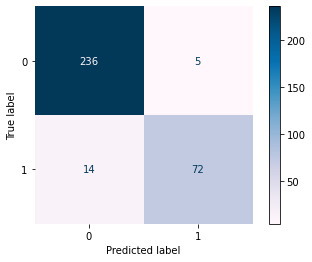

In [38]:
# RF classification using independent variables without filtering (to be compared with)
y0 = dfacrpv['acp']
x0 = dfacrpv[cn]

X_train, X_test, y_train, y_test = train_test_split(x0, y0,
                                                    test_size = 0.3, 
                                                    random_state = 7)
# rfc = RandomForestClassifier(n_estimators = 20, max_depth=5, 
#                               random_state = 6) 

rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)
print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred = rfc.predict(X_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred = y_pred_rfc))
confusion_matrix_rfc = metrics.confusion_matrix(y_test, y_pred_rfc)
cm_display_rfc = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_rfc)
cm_display_rfc.plot(cmap = 'PuBu')
plt.box(False)
acc_rfc = metrics.accuracy_score(y_test, y_pred_rfc)
print('accuracy', acc_rfc)
pre_rfc = metrics.precision_score(y_test, y_pred_rfc, average = None)
print('precision', pre_rfc)
senrec_rfc = metrics.recall_score(y_test, y_pred_rfc, average = None)
print('sensitivity recall', senrec_rfc)
f1_rfc = metrics.f1_score(y_test, y_pred_rfc, average = None)
print('f1 score', f1_rfc)
mcc_rfc = metrics.matthews_corrcoef(y_test, y_pred_rfc)
print('mcc score', mcc_rfc)
ka_rfc= metrics.cohen_kappa_score(y_test, y_pred_rfc)
print('kappa', ka_rfc)

In [701]:
# # Finding the best number of estimator
# rf = RandomForestClassifier(n_estimators=50, max_depth= 5, n_jobs=-1)
# rf.fit(X_train, y_train)
# predictions = []
# for tree in rf.estimators_:
#     predictions.append(tree.predict_proba(X_test)[None, :])
# predictions = np.vstack(predictions)
# cum_mean = np.cumsum(predictions, axis=0)/np.arange(1, predictions.shape[0] + 1)[:, None, None]
# scores = []
# for pred in cum_mean:
#     scores.append(accuracy_score(y_test, np.argmax(pred, axis=1)))
# plt.figure(figsize=(10, 6))
# plt.plot(scores, linewidth=3)
# plt.xlabel('num_trees')
# plt.ylabel('accuracy')


In [426]:
# joblib.dump(rfc, "my_random_forest_0_all91var.joblib")

['my_random_forest_0_all91var.joblib']

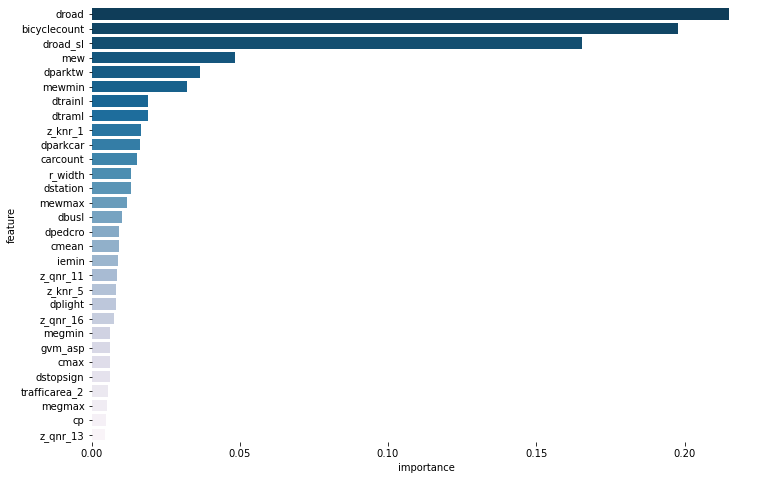

In [39]:
feature_name = list(x0.columns.values.tolist())
importances = rfc.feature_importances_
df_rfc = pd.DataFrame({'features':feature_name, 'importances':importances})
df_rfc.sort_values(by = ['importances'], ascending = False, inplace = True)
# df_rfct = df_rfc
df_rfct = df_rfc.nlargest(30, 'importances')
plt.figure(figsize = [12,8])
sn.barplot(x = df_rfct['importances'], y = df_rfct['features'],palette = "PuBu_r")
plt.xlabel('importance')
plt.ylabel('feature')
plt.box(False)
# plt.savefig('svp_rf_importance_0.png')

In [41]:
print(df_rfc.head(20))

        features  importances
24         droad     0.215096
31  bicyclecount     0.197803
25      droad_sl     0.165416
11           mew     0.048235
20       dparktw     0.036519
5         mewmin     0.032247
16       dtrainl     0.018987
15        dtraml     0.018900
66       z_knr_1     0.016729
19      dparkcar     0.016382
32      carcount     0.015359
29       r_width     0.013437
18      dstation     0.013137
8         mewmax     0.011843
14         dbusl     0.010132
21       dpedcro     0.009204
0          cmean     0.009128
7          iemin     0.008814
43      z_qnr_11     0.008436
70       z_knr_5     0.008357


In [46]:
# Mean decrease accuracy
i_mda = [] # importance mean decrease accuracy
initial_accuracy = accuracy_score(y_test, rfc.predict(X_test)) # initial accuracy
for i in range(x0.shape[1]):
    X_test_copy = X_test.copy()
    l = X_test_copy.iloc[:, i].values.tolist()
    X_test_copy.iloc[:,i] = np.random.shuffle(l)
    shuff_accuracy = accuracy_score(y_test, rfc.predict(X_test_copy))
    i_mda.append(initial_accuracy - shuff_accuracy)
    
accuracy_df = pd.DataFrame({'Feature': cn, 'Decrease in Accuracy': i_mda}).sort_values('Decrease in Accuracy', ascending=False)
print(accuracy_df)

         Feature  Decrease in Accuracy
31  bicyclecount              0.082569
25      droad_sl              0.061162
24         droad              0.058104
14         dbusl              0.009174
11           mew              0.009174
..           ...                   ...
9         megmax             -0.003058
7          iemin             -0.003058
32      carcount             -0.003058
29       r_width             -0.006116
71       z_knr_6             -0.006116

[91 rows x 2 columns]


In [50]:
accuracy_df['absolute'] = abs(accuracy_df['Decrease in Accuracy'])
accuracy_df = accuracy_df.sort_values('absolute', ascending=False)

In [52]:
print(accuracy_df.head(20))

         Feature  Decrease in Accuracy  absolute
31  bicyclecount              0.082569  0.082569
25      droad_sl              0.061162  0.061162
24         droad              0.058104  0.058104
14         dbusl              0.009174  0.009174
11           mew              0.009174  0.009174
29       r_width             -0.006116  0.006116
71       z_knr_6             -0.006116  0.006116
8         mewmax              0.006116  0.006116
70       z_knr_5              0.006116  0.006116
21       dpedcro              0.006116  0.006116
55      z_qnr_23              0.003058  0.003058
17       dplight              0.003058  0.003058
83     r_width_5              0.003058  0.003058
0          cmean              0.003058  0.003058
16       dtrainl              0.003058  0.003058
30    speedlimit              0.003058  0.003058
5         mewmin              0.003058  0.003058
27       gvm_msp              0.003058  0.003058
9         megmax             -0.003058  0.003058
13            ie    

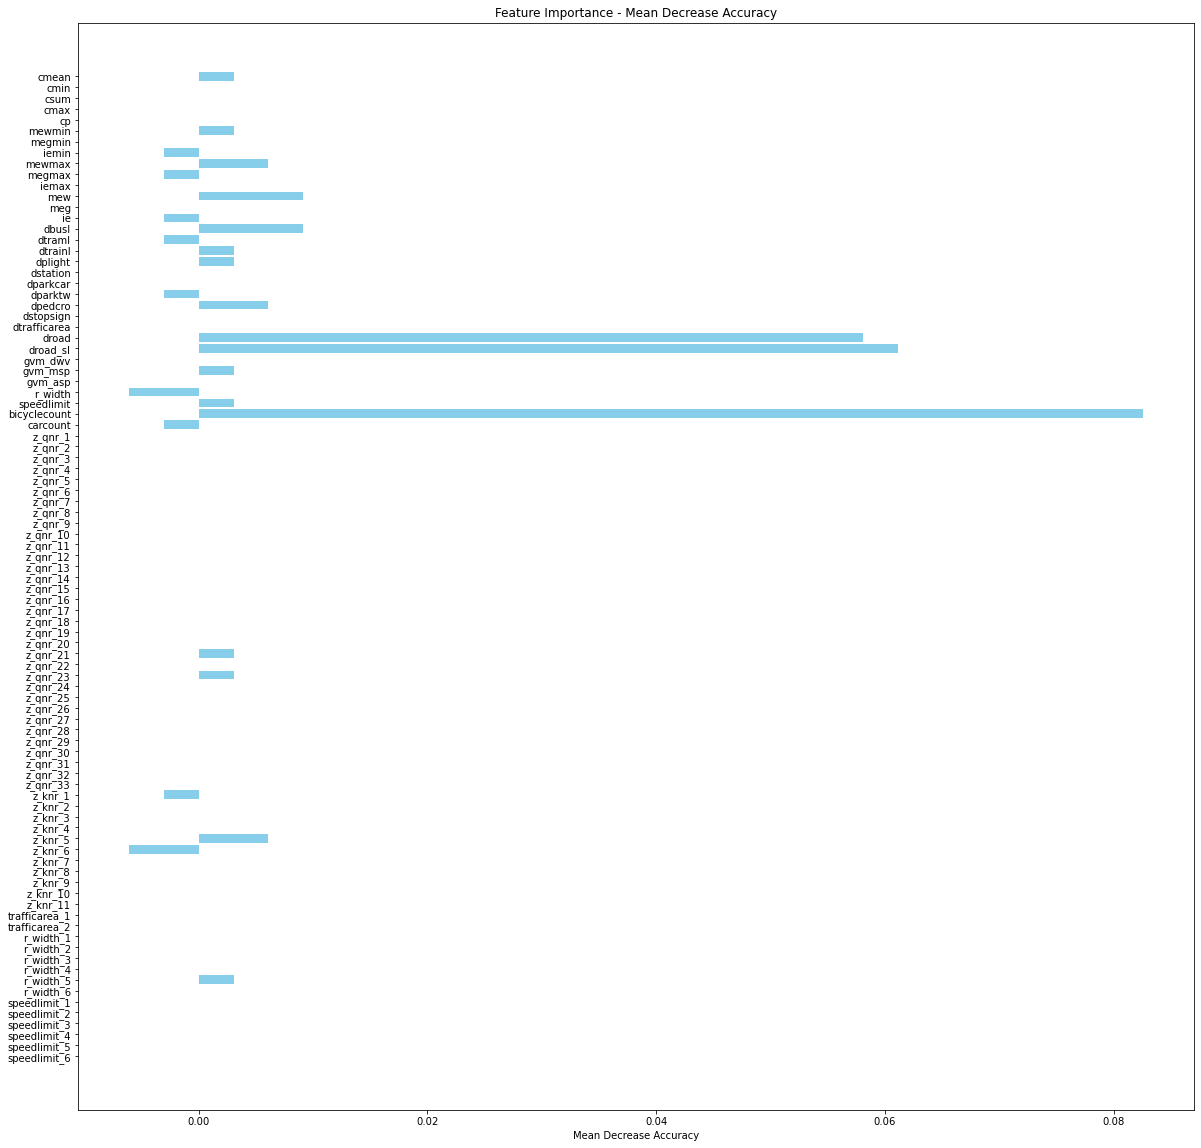

In [645]:
plt.figure(figsize=(20, 20))
plt.barh(cn, i_mda, color='skyblue')
plt.xlabel('Mean Decrease Accuracy')
plt.title('Feature Importance - Mean Decrease Accuracy')
plt.gca().invert_yaxis() 
plt.savefig('mda_rf0_91.png')
plt.show()

In [661]:
# Permutation feature importance
result = permutation_importance(rfc, X_test, y_test, n_repeats=10, random_state=0, n_jobs=-1)
perm_imp_df = pd.DataFrame({'Feature': cn, 'Permutation Importance': result.importances_mean}).sort_values('Permutation Importance', ascending=False)
print(perm_imp_df)

         Feature  Permutation Importance
31  bicyclecount                0.096942
25      droad_sl                0.077676
24         droad                0.075535
8         mewmax                0.008257
5         mewmin                0.006116
..           ...                     ...
9         megmax               -0.001835
29       r_width               -0.003364
66       z_knr_1               -0.003670
13            ie               -0.003670
71       z_knr_6               -0.004281

[91 rows x 2 columns]


         Feature  Permutation Importance
31  bicyclecount                0.096942
25      droad_sl                0.077676
24         droad                0.075535
8         mewmax                0.008257
5         mewmin                0.006116
70       z_knr_5                0.005199
14         dbusl                0.005199
11           mew                0.004893
0          cmean                0.004281
16       dtrainl                0.004281
21       dpedcro                0.004281
20       dparktw                0.003364
53      z_qnr_21                0.003058
3           cmax                0.003058
55      z_qnr_23                0.002752
27       gvm_msp                0.002752
83     r_width_5                0.002752
30    speedlimit                0.002752
19      dparkcar                0.002446
22     dstopsign                0.001835


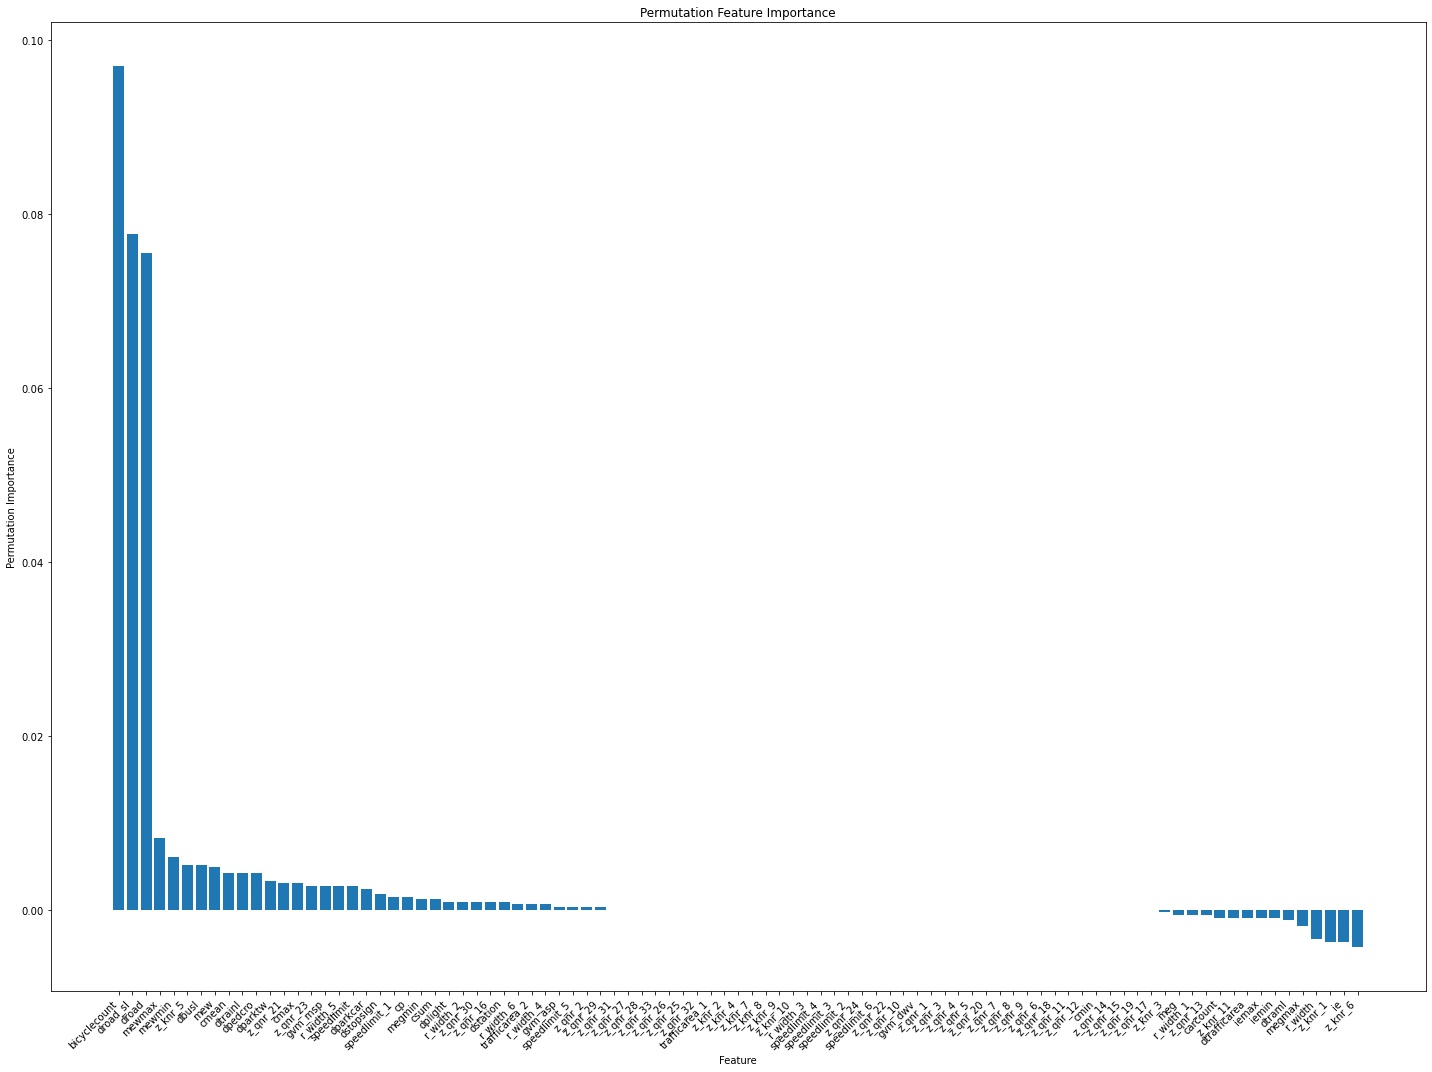

In [670]:
print(perm_imp_df.head(20))
plt.figure(figsize=(20, 15))
plt.bar(perm_imp_df['Feature'], perm_imp_df['Permutation Importance'])
plt.xlabel('Feature')
plt.ylabel('Permutation Importance')
plt.title('Permutation Feature Importance')
plt.xticks(rotation=45, ha='right')  # Adjust rotation for better visibility
plt.tight_layout()
plt.savefig('pfi_rf0_91.png')
plt.show()

In [53]:
# # SHAP value
# explainer = shap.TreeExplainer(rfc)
# shap_values = explainer.shap_values(X_test)
# shap_summary = np.abs(shap_values).mean(axis=0) 
# shap_summary_df = pd.DataFrame({'Feature': cn[:-1], 'SHAP values': shap_summary})
# shap_summary_df = shap_summary_df.sort_values('SHAP values', ascending=False)
# print(shap_summary_df)

# # Visualization
# plt.figure(figsize=(10, 6))
# plt.barh(shap_summary_df['Feature'], shap_summary_df['SHAP values'], color='skyblue')
# plt.xlabel('Mean Absolute SHAP Value')
# plt.ylabel('Feature')
# plt.title('Feature Importance based on SHAP Values')
# plt.gca().invert_yaxis() 
# plt.show()

## With cnvif - size 60

In [54]:
y = dfacrpv['acp']
x = dfacrpv[cnvif] 
print(len(cnvif))

60


In [55]:
rfc = joblib.load('my_random_forest_1_cnvif60.joblib')

Train data accuracy: 0.9986842105263158
Test data accuracy: 0.9510703363914373
accuracy 0.9510703363914373
precision [0.94820717 0.96052632]
sensitivity recall [0.98755187 0.84883721]
f1 score [0.96747967 0.90123457]
mcc score 0.871811196351556
kappa 0.8688787529447146


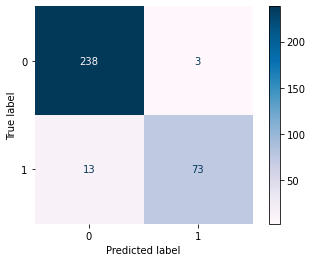

In [56]:

X_train, X_test, y_train, y_test = train_test_split(x, y,
                                                    test_size = 0.3, 
                                                    random_state = 7)
# rfc = RandomForestClassifier(n_estimators=20, max_depth=10, 
#                               random_state = 7) # 10 because of following codes to find the best number of trees
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)
print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred = rfc.predict(X_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred = y_pred_rfc))
confusion_matrix_rfc = metrics.confusion_matrix(y_test, y_pred_rfc)
cm_display_rfc = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_rfc)
cm_display_rfc.plot(cmap = 'PuBu')
plt.box(False)
acc_rfc = metrics.accuracy_score(y_test, y_pred_rfc)
print('accuracy', acc_rfc)
pre_rfc = metrics.precision_score(y_test, y_pred_rfc, average = None)
print('precision', pre_rfc)
senrec_rfc = metrics.recall_score(y_test, y_pred_rfc, average = None)
print('sensitivity recall', senrec_rfc)
f1_rfc = metrics.f1_score(y_test, y_pred_rfc, average = None)
print('f1 score', f1_rfc)
mcc_rfc = metrics.matthews_corrcoef(y_test, y_pred_rfc)
print('mcc score', mcc_rfc)
ka_rfc= metrics.cohen_kappa_score(y_test, y_pred_rfc)
print('kappa', ka_rfc)

In [230]:
# print(acc_rfc, pre_rfc, senrec_rfc, f1_rfc, mcc_rfc, ka_rfc)

In [700]:
# # Finding the best number of estimator
# rf = RandomForestClassifier(n_estimators=50, max_depth=10, n_jobs=-1)
# rf.fit(X_train, y_train)
# predictions = []
# for tree in rf.estimators_:
#     predictions.append(tree.predict_proba(X_test)[None, :])
# predictions = np.vstack(predictions)
# cum_mean = np.cumsum(predictions, axis=0)/np.arange(1, predictions.shape[0] + 1)[:, None, None]
# scores = []
# for pred in cum_mean:
#     scores.append(accuracy_score(y_test, np.argmax(pred, axis=1)))
# plt.figure(figsize=(10, 6))
# plt.plot(scores, linewidth=3)
# plt.xlabel('num_trees')
# plt.ylabel('accuracy')


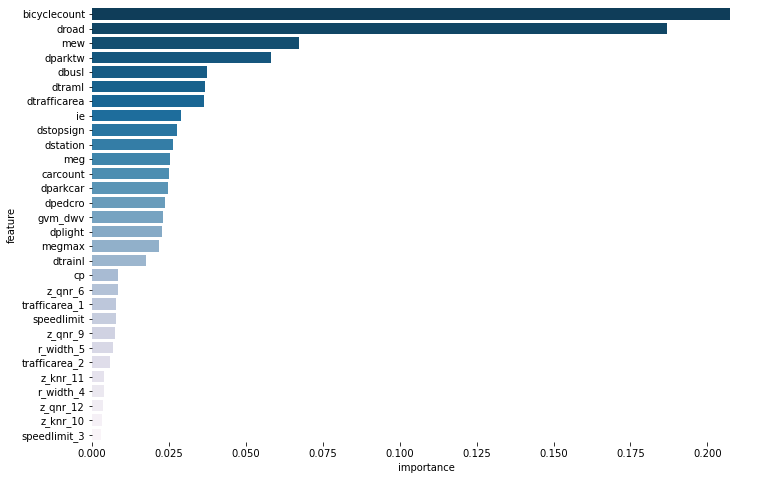

In [57]:
feature_name = list(x.columns.values.tolist())
importances = rfc.feature_importances_
df_rfc = pd.DataFrame({'features':feature_name, 'importances':importances})
df_rfc.sort_values(by = ['importances'], ascending = False, inplace = True)
df_rfct = df_rfc.nlargest(30, 'importances')
plt.figure(figsize = [12,8])
sn.barplot(x = df_rfct['importances'], y = df_rfct['features'],palette = "PuBu_r")
plt.xlabel('importance')
plt.ylabel('feature')
plt.box(False)
# plt.savefig('svp_rf_importance_1.png')

In [60]:
print(df_rfc.head(20))

        features  importances
19  bicyclecount     0.207195
16         droad     0.186972
3            mew     0.067357
12       dparktw     0.058145
6          dbusl     0.037296
7         dtraml     0.036677
15  dtrafficarea     0.036409
2             ie     0.028884
14     dstopsign     0.027559
10      dstation     0.026381
4            meg     0.025534
20      carcount     0.025227
11      dparkcar     0.024813
13       dpedcro     0.023665
17       gvm_dwv     0.023052
9        dplight     0.022875
5         megmax     0.021723
8        dtrainl     0.017451
0             cp     0.008614
25       z_qnr_6     0.008383


In [58]:
# joblib.dump(rfc, "my_random_forest_1_cnvif60.joblib")

In [59]:
# print(df_rfc['features'].tolist())

In [61]:
# Mean decrease accuracy
i_mda = [] # importance mean decrease accuracy
initial_accuracy = accuracy_score(y_test, rfc.predict(X_test)) # initial accuracy
for i in range(x.shape[1]):
    X_test_copy = X_test.copy()
    l = X_test_copy.iloc[:, i].values.tolist()
    X_test_copy.iloc[:,i] = np.random.shuffle(l)
    shuff_accuracy = accuracy_score(y_test, rfc.predict(X_test_copy))
    i_mda.append(initial_accuracy - shuff_accuracy)
    
accuracy_df = pd.DataFrame({'Feature': cnvif, 'Decrease in Accuracy': i_mda}).sort_values('Decrease in Accuracy', ascending=False)
print(accuracy_df)

          Feature  Decrease in Accuracy
19   bicyclecount              0.113150
16          droad              0.064220
3             mew              0.012232
10       dstation              0.012232
12        dparktw              0.006116
17        gvm_dwv              0.006116
6           dbusl              0.006116
15   dtrafficarea              0.006116
14      dstopsign              0.006116
0              cp              0.003058
29       z_qnr_12              0.003058
18     speedlimit              0.003058
11       dparkcar              0.003058
57   speedlimit_3              0.003058
5          megmax              0.003058
4             meg              0.003058
47       z_knr_10              0.000000
39       z_qnr_28              0.000000
40       z_qnr_31              0.000000
41       z_qnr_32              0.000000
42       z_qnr_33              0.000000
43        z_knr_2              0.000000
44        z_knr_3              0.000000
58   speedlimit_5              0.000000


In [62]:
accuracy_df['absolute'] = abs(accuracy_df['Decrease in Accuracy'])
accuracy_df = accuracy_df.sort_values('absolute', ascending=False)

In [63]:
print(accuracy_df.head(20))

         Feature  Decrease in Accuracy  absolute
19  bicyclecount              0.113150  0.113150
16         droad              0.064220  0.064220
3            mew              0.012232  0.012232
10      dstation              0.012232  0.012232
12       dparktw              0.006116  0.006116
17       gvm_dwv              0.006116  0.006116
6          dbusl              0.006116  0.006116
15  dtrafficarea              0.006116  0.006116
14     dstopsign              0.006116  0.006116
57  speedlimit_3              0.003058  0.003058
4            meg              0.003058  0.003058
5         megmax              0.003058  0.003058
13       dpedcro             -0.003058  0.003058
11      dparkcar              0.003058  0.003058
29      z_qnr_12              0.003058  0.003058
18    speedlimit              0.003058  0.003058
0             cp              0.003058  0.003058
24       z_qnr_4              0.000000  0.000000
2             ie              0.000000  0.000000
7         dtraml    

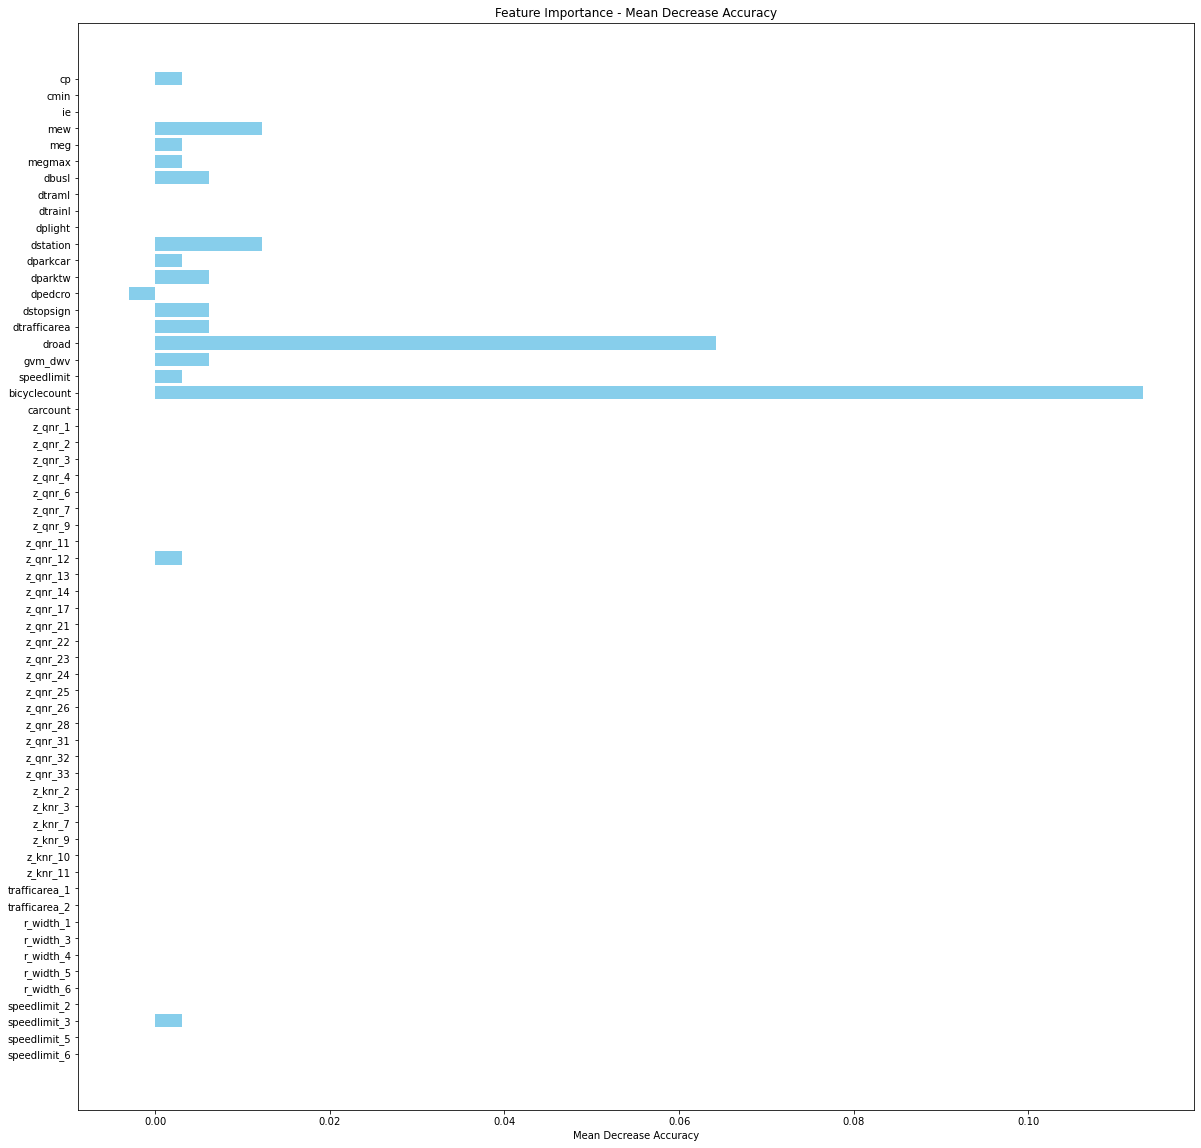

In [650]:
plt.figure(figsize=(20, 20))
plt.barh(cnvif, i_mda, color='skyblue')
plt.xlabel('Mean Decrease Accuracy')
plt.title('Feature Importance - Mean Decrease Accuracy')
plt.gca().invert_yaxis() 
plt.savefig('mda_rf1_cnvif60.png')
plt.show()

In [674]:
# Permutation feature importance
result = permutation_importance(rfc, X_test, y_test, n_repeats=10, random_state=0, n_jobs=-1)
perm_imp_df = pd.DataFrame({'Feature': cnvif, 'Permutation Importance': result.importances_mean}).sort_values('Permutation Importance', ascending=False)
print(perm_imp_df)

          Feature  Permutation Importance
19   bicyclecount                0.132110
16          droad                0.112232
3             mew                0.022018
12        dparktw                0.019266
11       dparkcar                0.013456
10       dstation                0.011009
4             meg                0.007951
17        gvm_dwv                0.006728
7          dtraml                0.006728
6           dbusl                0.006422
15   dtrafficarea                0.004281
29       z_qnr_12                0.003364
18     speedlimit                0.003364
14      dstopsign                0.003364
8         dtrainl                0.003058
0              cp                0.002446
5          megmax                0.002141
9         dplight                0.001835
57   speedlimit_3                0.001223
13        dpedcro                0.000917
53      r_width_4                0.000612
43        z_knr_2                0.000612
51      r_width_1                0

         Feature  Permutation Importance
19  bicyclecount                0.132110
16         droad                0.112232
3            mew                0.022018
12       dparktw                0.019266
11      dparkcar                0.013456
10      dstation                0.011009
4            meg                0.007951
17       gvm_dwv                0.006728
7         dtraml                0.006728
6          dbusl                0.006422
15  dtrafficarea                0.004281
29      z_qnr_12                0.003364
18    speedlimit                0.003364
14     dstopsign                0.003364
8        dtrainl                0.003058
0             cp                0.002446
5         megmax                0.002141
9        dplight                0.001835
57  speedlimit_3                0.001223
13       dpedcro                0.000917


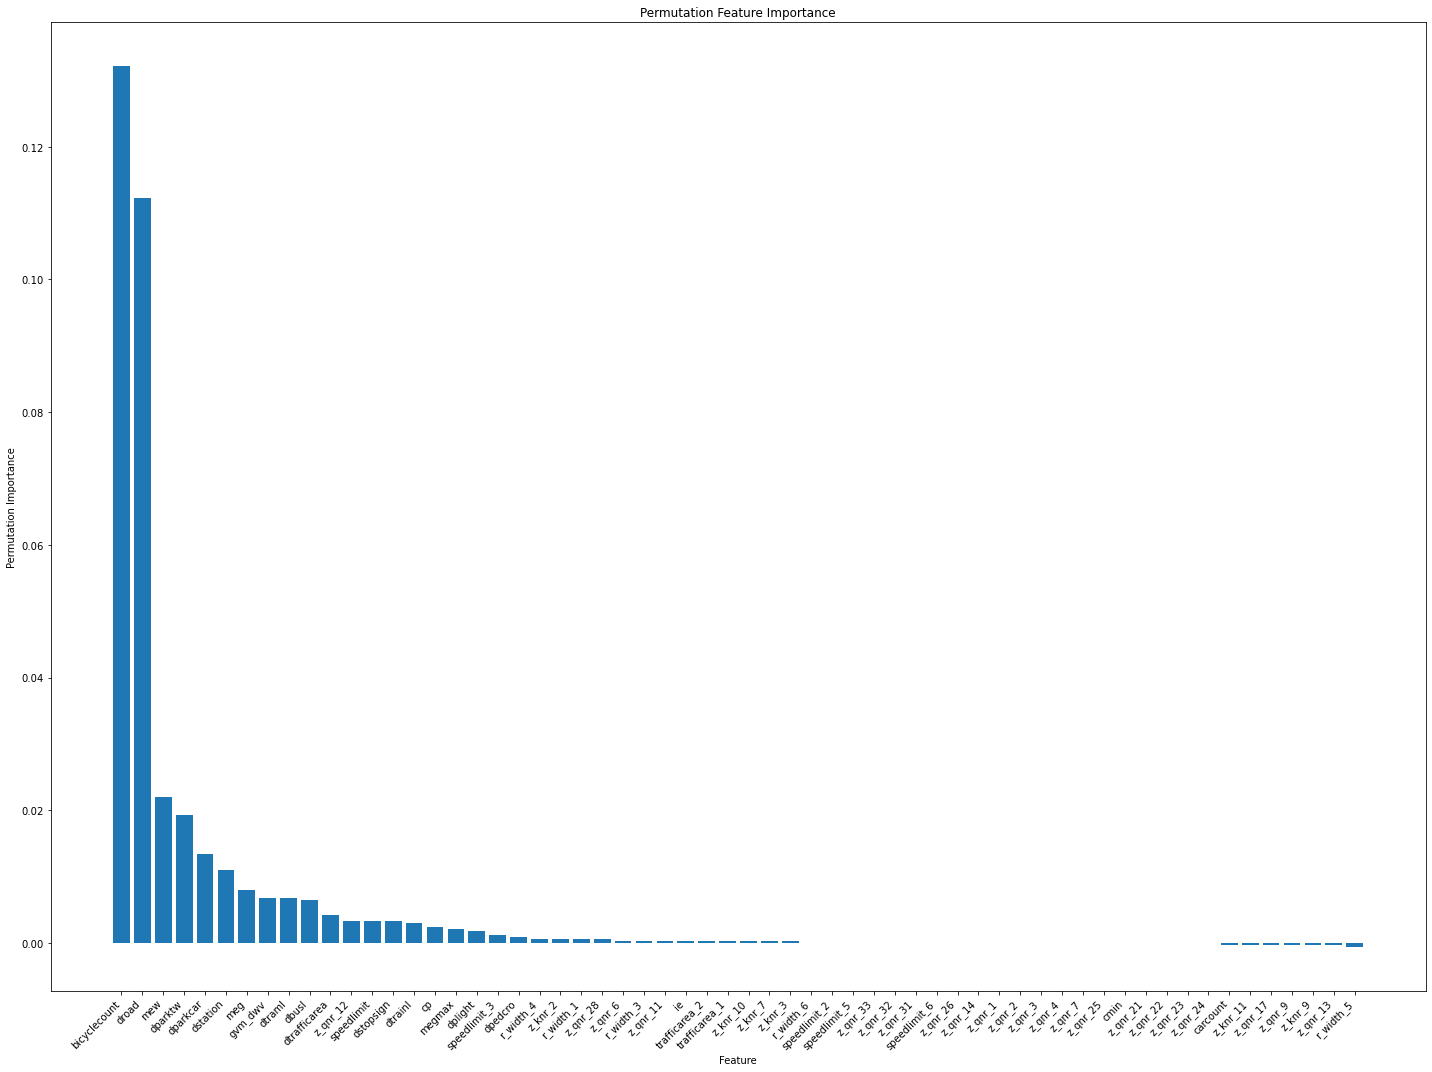

In [675]:
print(perm_imp_df.head(20))
plt.figure(figsize=(20, 15))
plt.bar(perm_imp_df['Feature'], perm_imp_df['Permutation Importance'])
plt.xlabel('Feature')
plt.ylabel('Permutation Importance')
plt.title('Permutation Feature Importance')
plt.xticks(rotation=45, ha='right')  # Adjust rotation for better visibility
plt.tight_layout()
plt.savefig('pfi_rf1_cnvif_60.png')
plt.show()

## With cntry1 - size 63

In [64]:
# cntry1 = cnvif + cmean, cmax, csum
cntry1 = ['cp', 'cmin', 'cmean', 'cmax', 'csum', 
          'ie', 'mew', 'meg', 'megmax', 'dbusl', 'dtraml', 'dtrainl', 
          'dplight', 'dstation', 'dparkcar', 'dparktw', 'dpedcro', 
          'dstopsign', 'dtrafficarea', 'droad', 'gvm_dwv', 'speedlimit', 
          'bicyclecount', 'carcount', 'z_qnr_1', 'z_qnr_2', 'z_qnr_3', 
          'z_qnr_4', 'z_qnr_6', 'z_qnr_7', 'z_qnr_9', 'z_qnr_11', 'z_qnr_12', 
          'z_qnr_13', 'z_qnr_14', 'z_qnr_17', 'z_qnr_21', 'z_qnr_22', 
          'z_qnr_23', 'z_qnr_24', 'z_qnr_25', 'z_qnr_26', 'z_qnr_28', 
          'z_qnr_31', 'z_qnr_32', 'z_qnr_33', 'z_knr_2', 'z_knr_3', 
          'z_knr_7', 'z_knr_9', 'z_knr_10', 'z_knr_11', 'trafficarea_1', 
          'trafficarea_2', 'r_width_1', 'r_width_3', 'r_width_4', 
          'r_width_5', 'r_width_6', 'speedlimit_2', 'speedlimit_3', 
          'speedlimit_5', 'speedlimit_6']

In [65]:
y = dfacrpv['acp']

x = dfacrpv[cntry1] 
print(len(cntry1))

X_train, X_test, y_train, y_test = train_test_split(x, y,
                                                    test_size = 0.3, 
                                                    random_state = 7)

63


In [66]:
rfc = joblib.load('my_random_forest_2_cnvifandcurbvar63.joblib')

Train data accuracy: 0.9986842105263158
Test data accuracy: 0.9480122324159022
accuracy 0.9480122324159022
precision [0.94094488 0.97260274]
sensitivity recall [0.99170124 0.8255814 ]
f1 score [0.96565657 0.89308176]
mcc score 0.864075582404673
kappa 0.8590410021046225


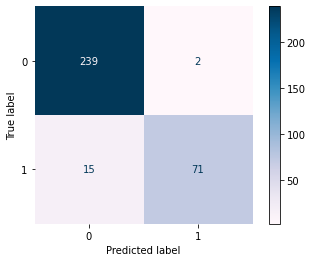

In [67]:
# rfc = RandomForestClassifier(n_estimators=20, max_depth=12, 
#                               random_state = 7) 
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)
print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred = rfc.predict(X_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred = y_pred_rfc))
confusion_matrix_rfc = metrics.confusion_matrix(y_test, y_pred_rfc)
cm_display_rfc = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_rfc)
cm_display_rfc.plot(cmap = 'PuBu')
plt.box(False)
acc_rfc = metrics.accuracy_score(y_test, y_pred_rfc)
print('accuracy', acc_rfc)
pre_rfc = metrics.precision_score(y_test, y_pred_rfc, average = None)
print('precision', pre_rfc)
senrec_rfc = metrics.recall_score(y_test, y_pred_rfc, average = None)
print('sensitivity recall', senrec_rfc)
f1_rfc = metrics.f1_score(y_test, y_pred_rfc, average = None)
print('f1 score', f1_rfc)
mcc_rfc = metrics.matthews_corrcoef(y_test, y_pred_rfc)
print('mcc score', mcc_rfc)
ka_rfc= metrics.cohen_kappa_score(y_test, y_pred_rfc)
print('kappa', ka_rfc)

In [699]:
# # Finding the best number of estimator
# rf = RandomForestClassifier(n_estimators=50, max_depth=12, n_jobs=-1)
# rf.fit(X_train, y_train)
# predictions = []
# for tree in rf.estimators_:
#     predictions.append(tree.predict_proba(X_test)[None, :])
# predictions = np.vstack(predictions)
# cum_mean = np.cumsum(predictions, axis=0)/np.arange(1, predictions.shape[0] + 1)[:, None, None]
# scores = []
# for pred in cum_mean:
#     scores.append(accuracy_score(y_test, np.argmax(pred, axis=1)))
# plt.figure(figsize=(10, 6))
# plt.plot(scores, linewidth=3)
# plt.xlabel('num_trees')
# plt.ylabel('accuracy')
# # best n_estimator 20

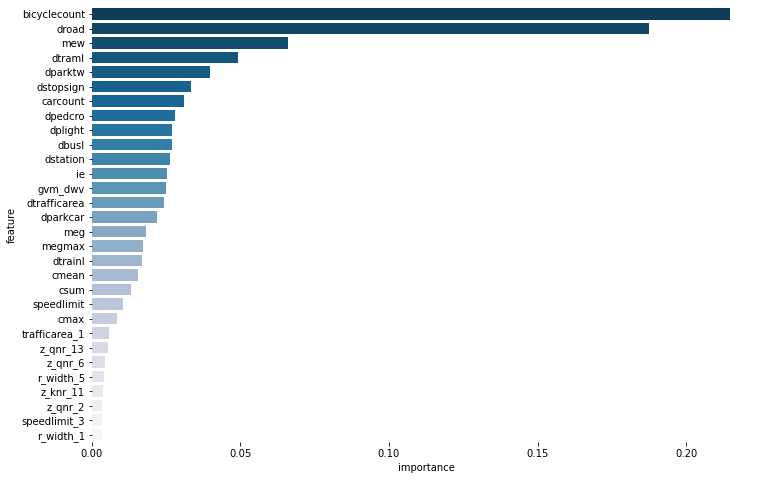

In [68]:
feature_name = list(x.columns.values.tolist())
importances = rfc.feature_importances_
df_rfc = pd.DataFrame({'features':feature_name, 'importances':importances})
df_rfc.sort_values(by = ['importances'], ascending = False, inplace = True)
df_rfct = df_rfc.nlargest(30, 'importances')
plt.figure(figsize = [12,8])
sn.barplot(x = df_rfct['importances'], y = df_rfct['features'],palette = "PuBu_r")
plt.xlabel('importance')
plt.ylabel('feature')
plt.box(False)
# plt.savefig('svp_rf_importance_3.png')

In [70]:
print(df_rfc.head(20))

        features  importances
22  bicyclecount     0.214552
19         droad     0.187451
6            mew     0.065977
10        dtraml     0.049140
15       dparktw     0.039778
17     dstopsign     0.033506
23      carcount     0.030881
16       dpedcro     0.028123
12       dplight     0.027061
9          dbusl     0.026845
13      dstation     0.026306
5             ie     0.025456
20       gvm_dwv     0.024918
18  dtrafficarea     0.024429
14      dparkcar     0.022049
7            meg     0.018238
8         megmax     0.017296
11       dtrainl     0.016725
2          cmean     0.015391
4           csum     0.013339


In [71]:
# Mean decrease accuracy
i_mda = [] # importance mean decrease accuracy
initial_accuracy = accuracy_score(y_test, rfc.predict(X_test)) # initial accuracy
for i in range(x.shape[1]):
    X_test_copy = X_test.copy()
    l = X_test_copy.iloc[:, i].values.tolist()
    X_test_copy.iloc[:,i] = np.random.shuffle(l)
    shuff_accuracy = accuracy_score(y_test, rfc.predict(X_test_copy))
    i_mda.append(initial_accuracy - shuff_accuracy)
    
accuracy_df = pd.DataFrame({'Feature': cntry1, 'Decrease in Accuracy': i_mda}).sort_values('Decrease in Accuracy', ascending=False)
print(accuracy_df)

         Feature  Decrease in Accuracy
22  bicyclecount              0.116208
19         droad              0.079511
6            mew              0.015291
15       dparktw              0.012232
20       gvm_dwv              0.012232
..           ...                   ...
50      z_knr_10             -0.003058
17     dstopsign             -0.006116
13      dstation             -0.006116
11       dtrainl             -0.006116
5             ie             -0.009174

[63 rows x 2 columns]


In [72]:
accuracy_df['absolute'] = abs(accuracy_df['Decrease in Accuracy'])
accuracy_df = accuracy_df.sort_values('absolute', ascending=False)

In [73]:
print(accuracy_df.head(20))

          Feature  Decrease in Accuracy  absolute
22   bicyclecount              0.116208  0.116208
19          droad              0.079511  0.079511
6             mew              0.015291  0.015291
15        dparktw              0.012232  0.012232
20        gvm_dwv              0.012232  0.012232
7             meg              0.009174  0.009174
10         dtraml              0.009174  0.009174
57      r_width_5              0.009174  0.009174
14       dparkcar              0.009174  0.009174
5              ie             -0.009174  0.009174
3            cmax              0.006116  0.006116
52  trafficarea_1              0.006116  0.006116
8          megmax              0.006116  0.006116
53  trafficarea_2              0.006116  0.006116
11        dtrainl             -0.006116  0.006116
13       dstation             -0.006116  0.006116
17      dstopsign             -0.006116  0.006116
2           cmean             -0.003058  0.003058
21     speedlimit             -0.003058  0.003058


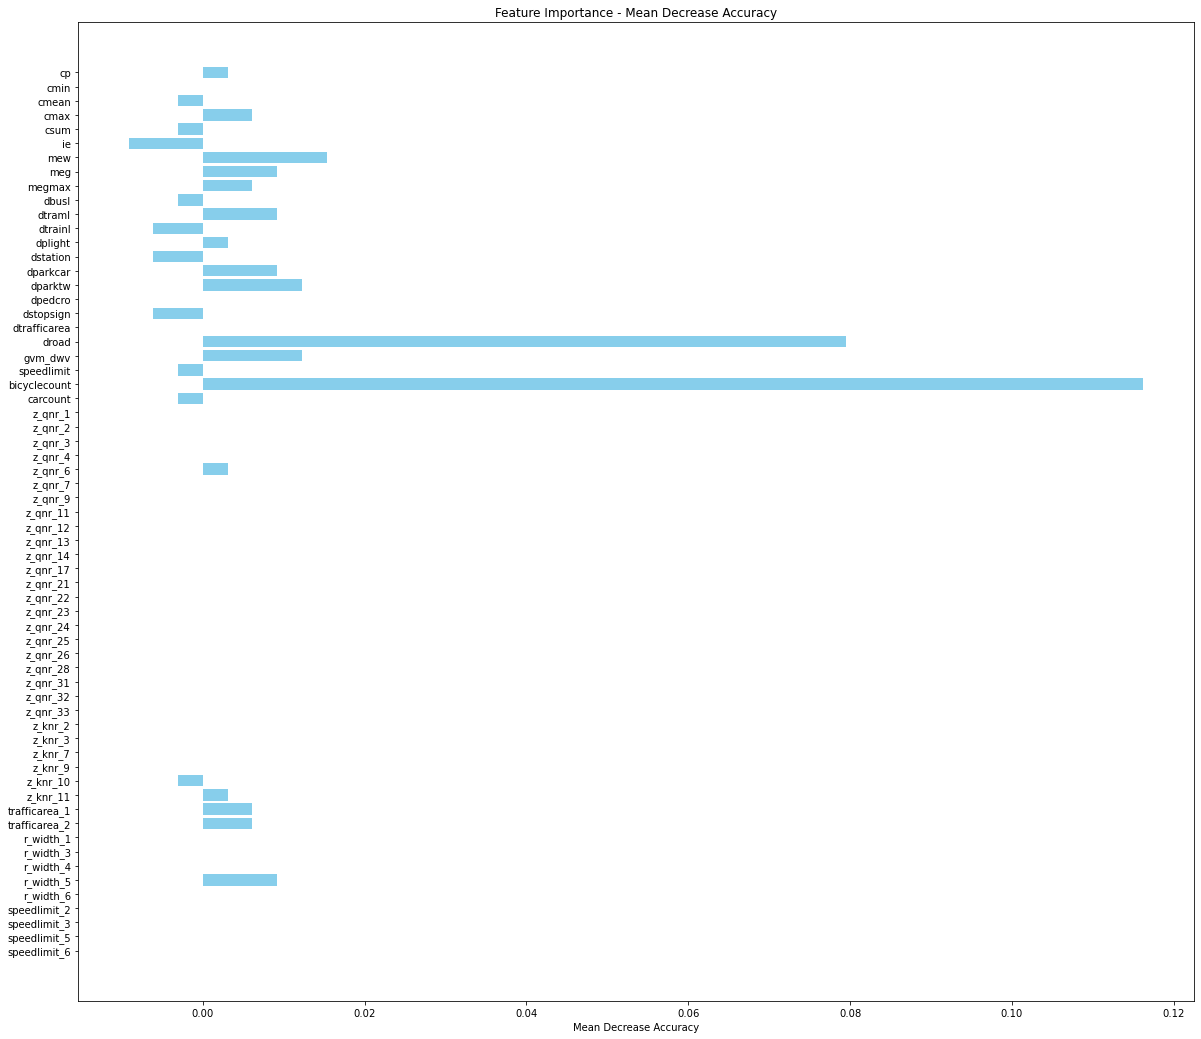

In [656]:
plt.figure(figsize=(20, 18))
plt.barh(cntry1, i_mda, color='skyblue')
plt.xlabel('Mean Decrease Accuracy')
plt.title('Feature Importance - Mean Decrease Accuracy')
plt.gca().invert_yaxis() 
plt.savefig('mda_rf2_cntry1_63.png')
plt.show()

In [696]:
# Permutation feature importance
result = permutation_importance(rfc, X_test, y_test, n_repeats=10, random_state=0, n_jobs=-1)
perm_imp_df = pd.DataFrame({'Feature': cntry1, 'Permutation Importance': result.importances_mean}).sort_values('Permutation Importance', ascending=False)
# print(perm_imp_df)

          Feature  Permutation Importance
22   bicyclecount                0.133333
19          droad                0.117431
6             mew                0.021407
15        dparktw                0.018654
20        gvm_dwv                0.009174
13       dstation                0.008257
8          megmax                0.007034
10         dtraml                0.006422
9           dbusl                0.006422
7             meg                0.006422
52  trafficarea_1                0.006116
53  trafficarea_2                0.005810
51       z_knr_11                0.004587
14       dparkcar                0.004281
33       z_qnr_13                0.003058
4            csum                0.002446
28        z_qnr_6                0.002446
0              cp                0.002141
3            cmax                0.000612
25        z_qnr_2                0.000612


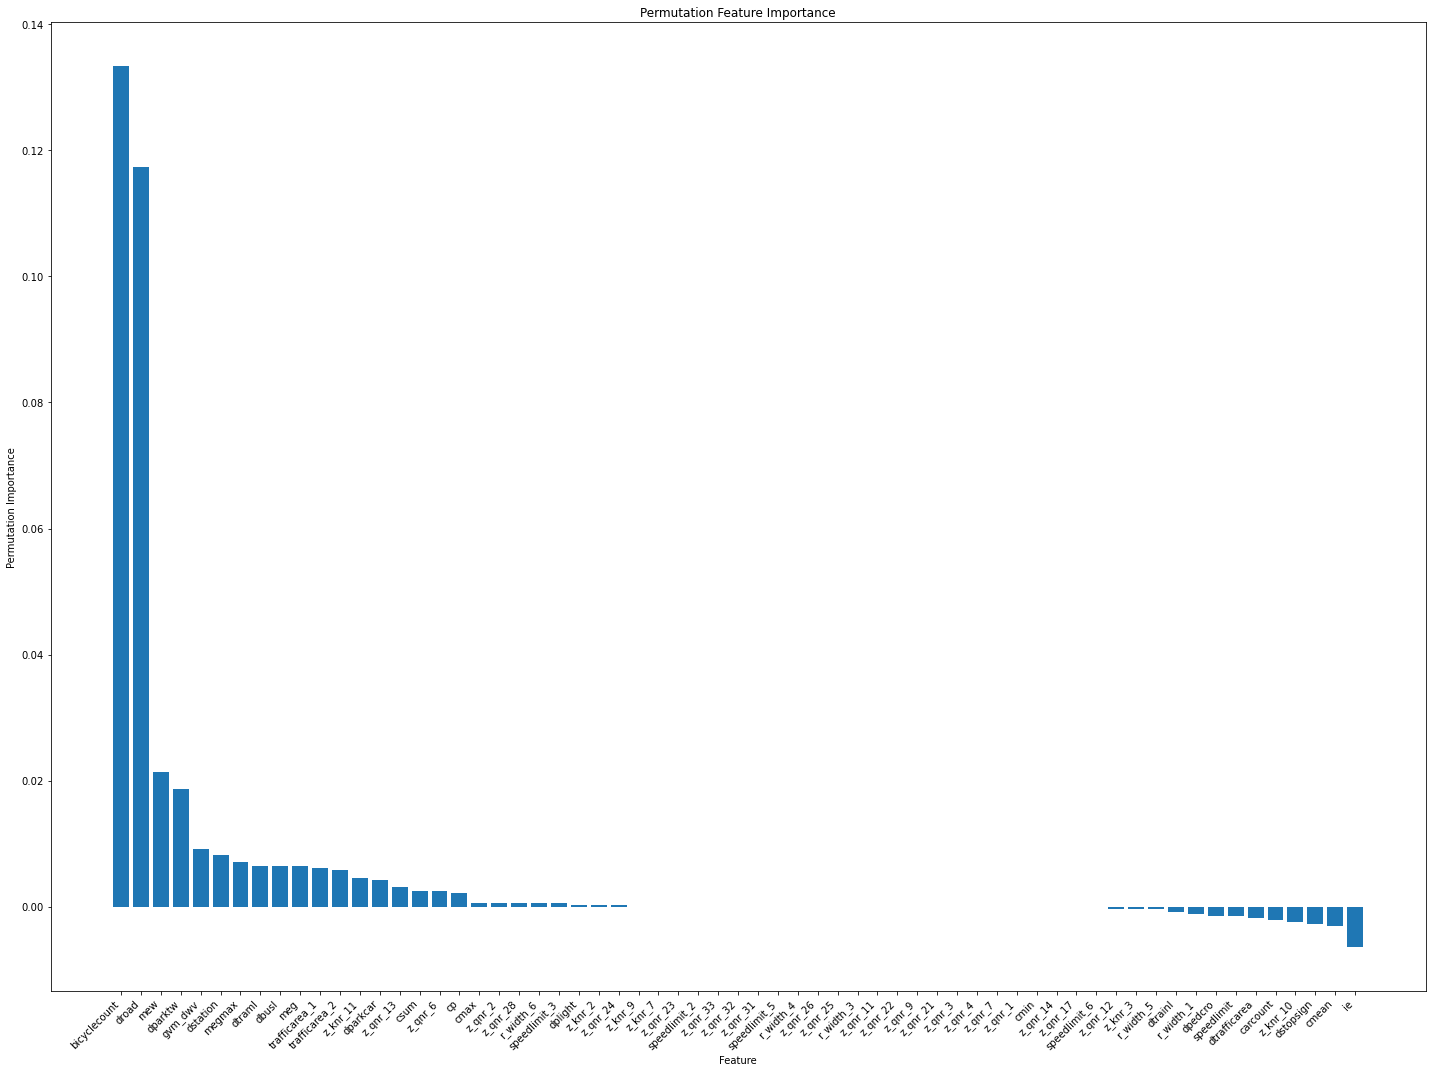

In [697]:
print(perm_imp_df.head(20))
plt.figure(figsize=(20, 15))
plt.bar(perm_imp_df['Feature'], perm_imp_df['Permutation Importance'])
plt.xlabel('Feature')
plt.ylabel('Permutation Importance')
plt.title('Permutation Feature Importance')
plt.xticks(rotation=45, ha='right')  # Adjust rotation for better visibility
plt.tight_layout()
plt.savefig('pfi_rf2_cntry1_63.png')
plt.show()

## With cnvifnew - size 61

In [78]:
# cnvifnew = cnvif + cmean
print(cnvifnew)

['cp', 'cmin', 'cmean', 'ie', 'mew', 'meg', 'megmax', 'dbusl', 'dtraml', 'dtrainl', 'dplight', 'dstation', 'dparkcar', 'dparktw', 'dpedcro', 'dstopsign', 'dtrafficarea', 'droad', 'gvm_dwv', 'speedlimit', 'bicyclecount', 'carcount', 'z_qnr_1', 'z_qnr_2', 'z_qnr_3', 'z_qnr_4', 'z_qnr_6', 'z_qnr_7', 'z_qnr_9', 'z_qnr_11', 'z_qnr_12', 'z_qnr_13', 'z_qnr_14', 'z_qnr_17', 'z_qnr_21', 'z_qnr_22', 'z_qnr_23', 'z_qnr_24', 'z_qnr_25', 'z_qnr_26', 'z_qnr_28', 'z_qnr_31', 'z_qnr_32', 'z_qnr_33', 'z_knr_2', 'z_knr_3', 'z_knr_7', 'z_knr_9', 'z_knr_10', 'z_knr_11', 'trafficarea_1', 'trafficarea_2', 'r_width_1', 'r_width_3', 'r_width_4', 'r_width_5', 'r_width_6', 'speedlimit_2', 'speedlimit_3', 'speedlimit_5', 'speedlimit_6']


In [79]:
y = dfacrpv['acp']
x = dfacrpv[cnvifnew]
print(len(cnvifnew))

X_train, X_test, y_train, y_test = train_test_split(x, y,
                                                    test_size = 0.3, 
                                                    random_state = 7)

61


Train data accuracy: 0.9973684210526316
Test data accuracy: 0.9541284403669725
accuracy 0.9541284403669725
precision [0.9484127  0.97333333]
sensitivity recall [0.99170124 0.84883721]
f1 score [0.96957404 0.9068323 ]
mcc score 0.8802062170940408
kappa 0.8765944599592422


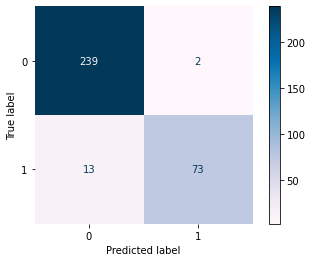

In [80]:
rfc = joblib.load('my_random_forest_3_cnvifandcmean61.joblib')
# rfc = RandomForestClassifier(n_estimators=20, max_depth=12, 
#                               random_state = 7) 
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)
print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred = rfc.predict(X_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred = y_pred_rfc))
confusion_matrix_rfc = metrics.confusion_matrix(y_test, y_pred_rfc)
cm_display_rfc = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_rfc)
cm_display_rfc.plot(cmap = 'PuBu')
plt.box(False)
acc_rfc = metrics.accuracy_score(y_test, y_pred_rfc)
print('accuracy', acc_rfc)
pre_rfc = metrics.precision_score(y_test, y_pred_rfc, average = None)
print('precision', pre_rfc)
senrec_rfc = metrics.recall_score(y_test, y_pred_rfc, average = None)
print('sensitivity recall', senrec_rfc)
f1_rfc = metrics.f1_score(y_test, y_pred_rfc, average = None)
print('f1 score', f1_rfc)
mcc_rfc = metrics.matthews_corrcoef(y_test, y_pred_rfc)
print('mcc score', mcc_rfc)
ka_rfc= metrics.cohen_kappa_score(y_test, y_pred_rfc)
print('kappa', ka_rfc)

In [81]:
# # Finding the best number of estimator
# rf = RandomForestClassifier(n_estimators=50, max_depth=12, n_jobs=-1)
# rf.fit(X_train, y_train)
# predictions = []
# for tree in rf.estimators_:
#     predictions.append(tree.predict_proba(X_test)[None, :])
# predictions = np.vstack(predictions)
# cum_mean = np.cumsum(predictions, axis=0)/np.arange(1, predictions.shape[0] + 1)[:, None, None]
# scores = []
# for pred in cum_mean:
#     scores.append(accuracy_score(y_test, np.argmax(pred, axis=1)))
# plt.figure(figsize=(10, 6))
# plt.plot(scores, linewidth=3)
# plt.xlabel('num_trees')
# plt.ylabel('accuracy')
# # best n_estimator 20

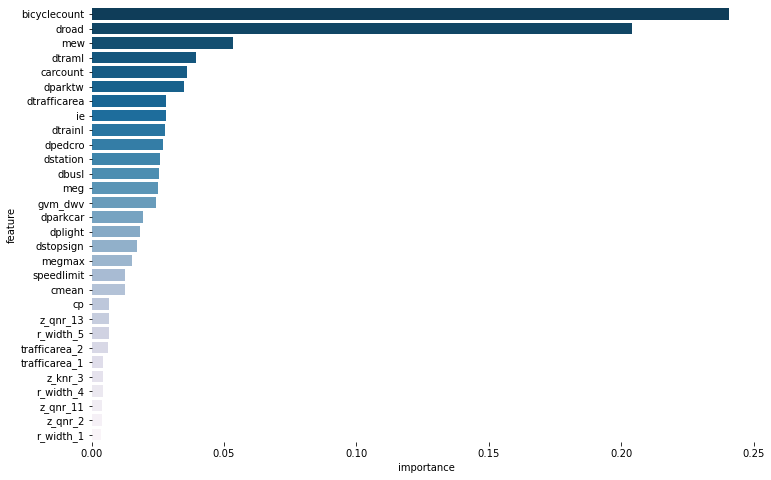

In [82]:
feature_name = list(x.columns.values.tolist())
importances = rfc.feature_importances_
df_rfc = pd.DataFrame({'features':feature_name, 'importances':importances})
df_rfc.sort_values(by = ['importances'], ascending = False, inplace = True)
df_rfct = df_rfc.nlargest(30, 'importances')
plt.figure(figsize = [12,8])
sn.barplot(x = df_rfct['importances'], y = df_rfct['features'],palette = "PuBu_r")
plt.xlabel('importance')
plt.ylabel('feature')
plt.box(False)
# plt.savefig('svp_rf_importance_3.png')

In [83]:
print(df_rfc.head(20))

        features  importances
20  bicyclecount     0.240831
17         droad     0.204084
4            mew     0.053367
8         dtraml     0.039277
21      carcount     0.035996
13       dparktw     0.034861
16  dtrafficarea     0.028186
3             ie     0.027974
9        dtrainl     0.027595
14       dpedcro     0.026905
11      dstation     0.025972
7          dbusl     0.025567
5            meg     0.025109
18       gvm_dwv     0.024213
12      dparkcar     0.019347
10       dplight     0.018239
15     dstopsign     0.017028
6         megmax     0.015319
19    speedlimit     0.012645
2          cmean     0.012600


In [520]:
# joblib.dump(rfc, "my_random_forest_3_cnvifandcmean61.joblib")

['my_random_forest_3_cnvifandcmean61.joblib']

In [84]:
# Mean decrease accuracy
i_mda = [] # importance mean decrease accuracy
initial_accuracy = accuracy_score(y_test, rfc.predict(X_test)) # initial accuracy
for i in range(x.shape[1]):
    X_test_copy = X_test.copy()
    l = X_test_copy.iloc[:, i].values.tolist()
    X_test_copy.iloc[:,i] = np.random.shuffle(l)
    shuff_accuracy = accuracy_score(y_test, rfc.predict(X_test_copy))
    i_mda.append(initial_accuracy - shuff_accuracy)
    
accuracy_df = pd.DataFrame({'Feature': cnvifnew, 'Decrease in Accuracy': i_mda}).sort_values('Decrease in Accuracy', ascending=False)
print(accuracy_df)

          Feature  Decrease in Accuracy
20   bicyclecount              0.125382
17          droad              0.058104
0              cp              0.009174
2           cmean              0.009174
5             meg              0.009174
..            ...                   ...
33       z_qnr_17              0.000000
34       z_qnr_21              0.000000
60   speedlimit_6              0.000000
51  trafficarea_2             -0.003058
12       dparkcar             -0.003058

[61 rows x 2 columns]


In [85]:
accuracy_df['absolute'] = abs(accuracy_df['Decrease in Accuracy'])
accuracy_df = accuracy_df.sort_values('absolute', ascending=False)

In [86]:
print(accuracy_df.head(20))

          Feature  Decrease in Accuracy  absolute
20   bicyclecount              0.125382  0.125382
17          droad              0.058104  0.058104
0              cp              0.009174  0.009174
2           cmean              0.009174  0.009174
5             meg              0.009174  0.009174
8          dtraml              0.006116  0.006116
18        gvm_dwv              0.006116  0.006116
15      dstopsign              0.003058  0.003058
31       z_qnr_13              0.003058  0.003058
6          megmax              0.003058  0.003058
4             mew              0.003058  0.003058
50  trafficarea_1              0.003058  0.003058
49       z_knr_11              0.003058  0.003058
14        dpedcro              0.003058  0.003058
13        dparktw              0.003058  0.003058
55      r_width_5              0.003058  0.003058
10        dplight              0.003058  0.003058
54      r_width_4              0.003058  0.003058
51  trafficarea_2             -0.003058  0.003058


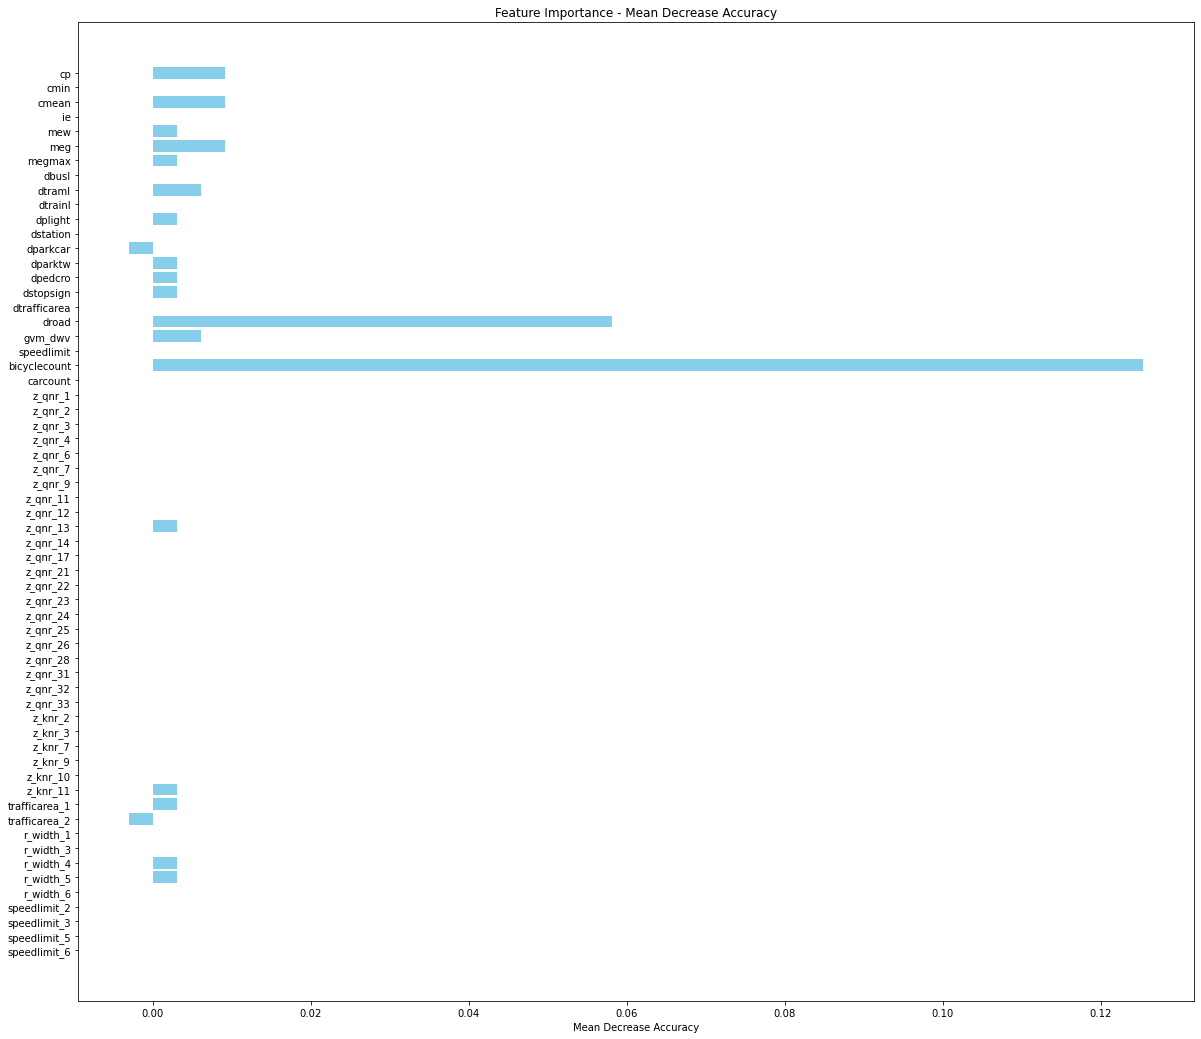

In [639]:
plt.figure(figsize=(20, 18))
plt.barh(cnvifnew, i_mda, color='skyblue')
plt.xlabel('Mean Decrease Accuracy')
plt.title('Feature Importance - Mean Decrease Accuracy')
plt.gca().invert_yaxis() 
# plt.savefig('mda_rf3_cnvifnew_61.png')
plt.show()

In [689]:
# Permutation feature importance
result = permutation_importance(rfc, X_test, y_test, n_repeats=10, random_state=0, n_jobs=-1)
perm_imp_df = pd.DataFrame({'Feature': cnvifnew, 'Permutation Importance': result.importances_mean}).sort_values('Permutation Importance', ascending=False)
# print(perm_imp_df)

          Feature  Permutation Importance
20   bicyclecount                0.147706
17          droad                0.139755
5             meg                0.008563
4             mew                0.007951
9         dtrainl                0.007645
2           cmean                0.007339
19     speedlimit                0.007339
16   dtrafficarea                0.006422
14        dpedcro                0.006116
8          dtraml                0.005505
13        dparktw                0.004893
7           dbusl                0.004587
11       dstation                0.003976
10        dplight                0.003976
54      r_width_4                0.003670
55      r_width_5                0.003670
50  trafficarea_1                0.003670
18        gvm_dwv                0.003364
31       z_qnr_13                0.003364
15      dstopsign                0.002446


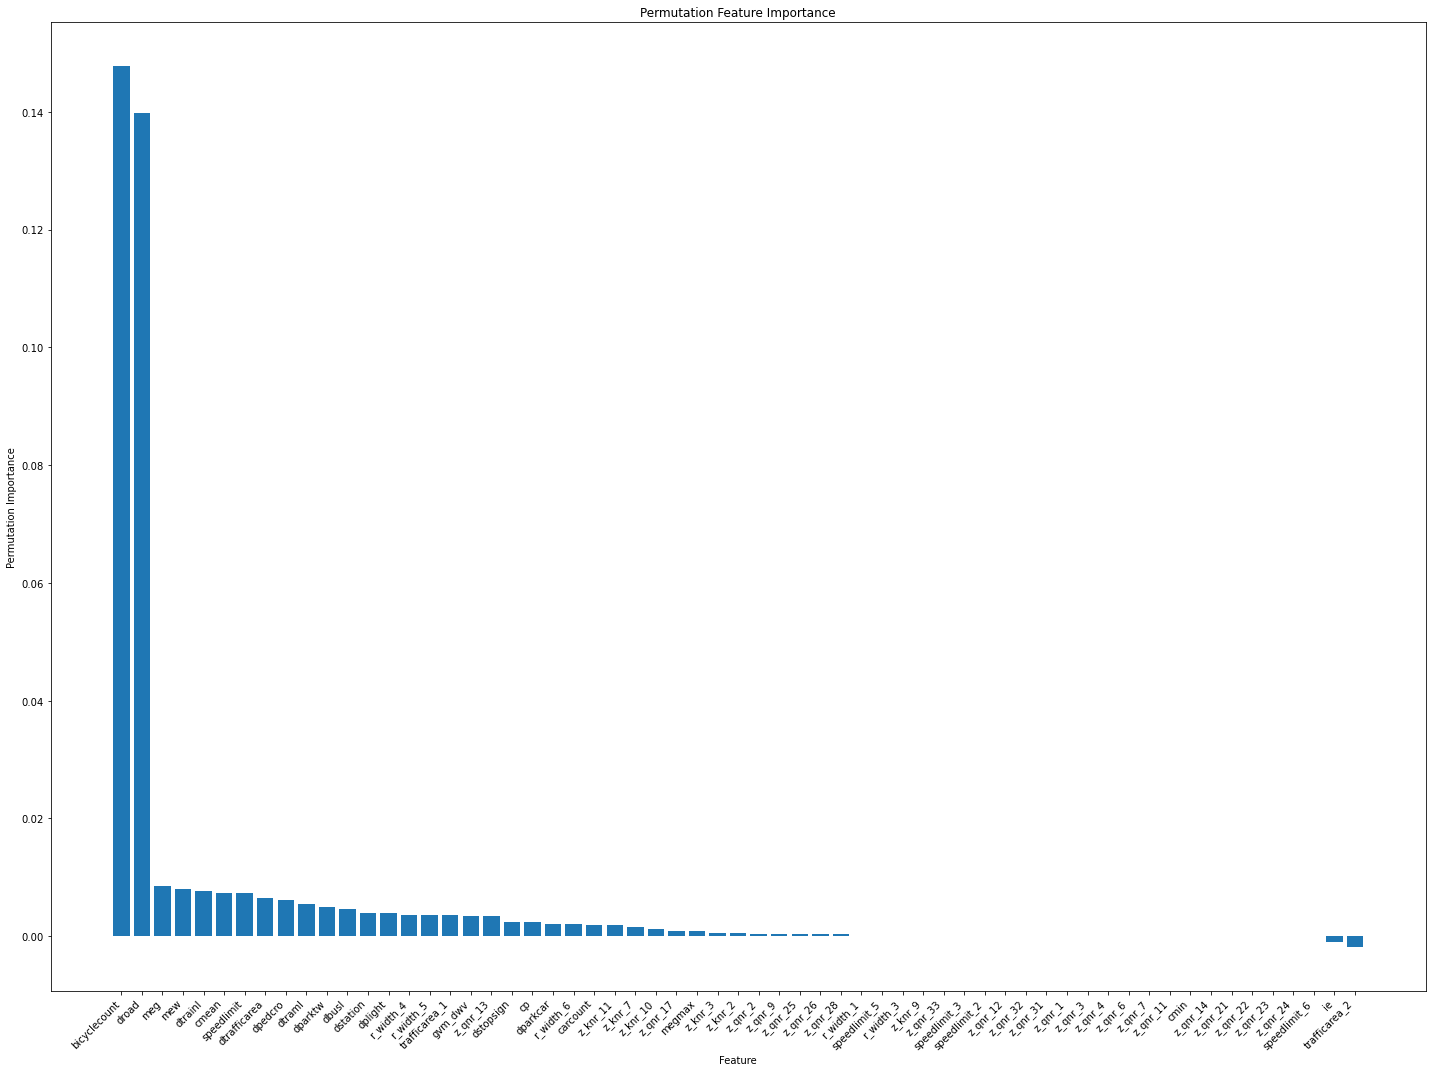

In [691]:
print(perm_imp_df.head(20))
plt.figure(figsize=(20, 15))
plt.bar(perm_imp_df['Feature'], perm_imp_df['Permutation Importance'])
plt.xlabel('Feature')
plt.ylabel('Permutation Importance')
plt.title('Permutation Feature Importance')
plt.xticks(rotation=45, ha='right')  # Adjust rotation for better visibility
plt.tight_layout()
# plt.savefig('pfi_rf3_cnvifnew_61.png')
plt.show()

In [ ]:
# svp_rf_importance_0.png (joblib0, of all 91 variables)
# svp_rf_importance_1.png (joblib1, of cnvif, 60 variables)
# svp_rf_importance_4.png (joblib2, of cntry1 = cnvif + curb variables, 63)
# svp_rf_importance_3.png (joblib3, of cnvifnew = cnvif + cmean 61 variables)

# svp_rf_importance_2.png (of cntryn)

# PCA analysis

In [220]:
y = dfacrpv['acp']
x = dfacrpv[cntryn]

X_train, X_test, y_train, y_test = train_test_split(x, y,
                                                    test_size = 0.3, 
                                                    random_state = 8)

In [222]:
pca = PCA(n_components = 2)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

explained_variance = pca.explained_variance_ratio_

In [223]:
pca0 = PCA(n_components = 2)
xpca = pca.fit(x)
xpca.explained_variance_ratio_

array([0.14792903, 0.14080412])

In [224]:
# xpca.components_

In [225]:
r = np.abs(xpca.components_.T)
r/r.sum(axis = 0)

array([[8.83212295e-03, 4.07252168e-04],
       [2.83922716e-01, 1.00241464e-01],
       [2.00487310e-02, 5.05363250e-03],
       [4.29739435e-02, 1.05012063e-02],
       [1.82283645e-02, 2.29351084e-02],
       [2.44478232e-02, 6.19054539e-03],
       [3.27360708e-02, 1.57326665e-02],
       [9.18784491e-03, 2.55160264e-02],
       [4.81162651e-02, 4.56580119e-02],
       [2.74999118e-02, 4.28261559e-02],
       [3.46152600e-03, 2.29569258e-02],
       [7.14526137e-04, 2.70948514e-03],
       [1.35301274e-02, 1.26241467e-02],
       [2.74049464e-02, 4.20735068e-02],
       [4.77195962e-03, 1.30406811e-02],
       [2.14043345e-02, 1.79140667e-02],
       [6.69930157e-03, 9.59885204e-03],
       [7.04845510e-02, 1.18431762e-01],
       [6.59474390e-02, 1.13987222e-01],
       [4.42034153e-02, 5.23882243e-02],
       [3.24985360e-02, 2.82639711e-02],
       [1.34682722e-02, 3.03561319e-02],
       [6.53655449e-03, 1.59072089e-02],
       [1.88121163e-03, 6.21411986e-03],
       [3.001053

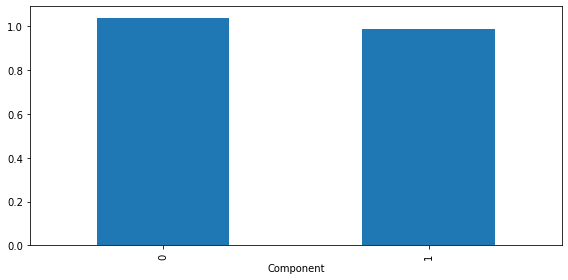

In [226]:
explained_variance = pd.DataFrame(pca.explained_variance_)
#showing the first value
ax = explained_variance.head(10).plot.bar(legend=False, figsize=(8, 4))
ax.set_xlabel('Component')
plt.tight_layout()
plt.show()

In [227]:
# classifier = sm.Logit(max_iter = 500, method='bfgs', random_state = 20)
# classifier.fit(X_train, y_train)

In [228]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state=20)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=20)

In [229]:
y_pred = classifier.predict(X_test)
# making confusion matrix between
#  test set of Y and predicted value.
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

In [230]:
cm

array([[210,  21],
       [ 59,  37]], dtype=int64)

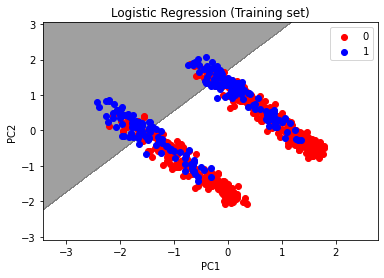

In [231]:
# Predicting the training set
# result through scatter plot
from matplotlib.colors import ListedColormap

X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1,
                               stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1,
                               stop=X_set[:, 1].max() + 1, step=0.01))

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),
                                                  X2.ravel()]).T).reshape(X1.shape), alpha=0.75,
             cmap=ListedColormap(('white', 'grey')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color=ListedColormap(('red','blue'))(i), label=j)

plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')  # for Xlabel
plt.ylabel('PC2')  # for Ylabel
plt.legend()  # to show legend

# show scatter plot
plt.show()

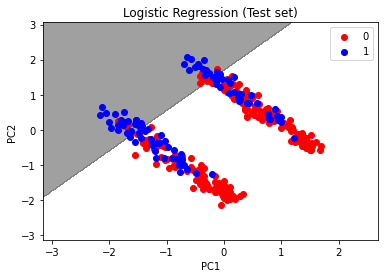

In [232]:
# Visualising the Test set results through scatter plot
X_set, y_set = X_test, y_test

X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1,
                               stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1,
                               stop=X_set[:, 1].max() + 1, step=0.01))

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),
                                                  X2.ravel()]).T).reshape(X1.shape), alpha=0.75,
             cmap=ListedColormap(('white', 'grey')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color=ListedColormap(('red','blue'))(i), label=j)

# title for scatter plot
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1')  # for Xlabel
plt.ylabel('PC2')  # for Ylabel
plt.legend()

# show scatter plot
plt.show()

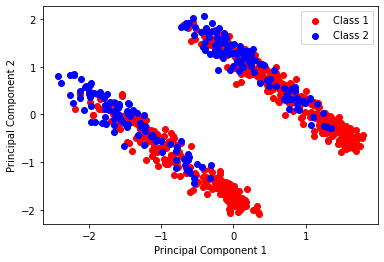

In [233]:
# plot the first two principal components with labels
colors = ["r", "b"]
labels = ["Class 1", "Class 2"]
for i, color, label in zip(np.unique(y), colors, labels):
    plt.scatter(X_train[y_train == i, 0], X_train[y_train == i, 1], color=color, label=label)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()

In [234]:
principalComponents = pca.fit_transform(x)
principaldf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
finaldf = pd.concat([principaldf, dfacrpv['acp']], axis = 1)


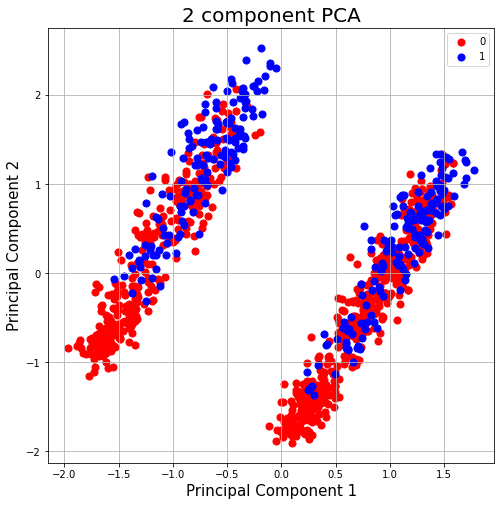

In [235]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = [0, 1]
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finaldf['acp'] == target
    ax.scatter(finaldf.loc[indicesToKeep, 'principal component 1']
               , finaldf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [401]:
pca = PCA(n_components = 0.95)

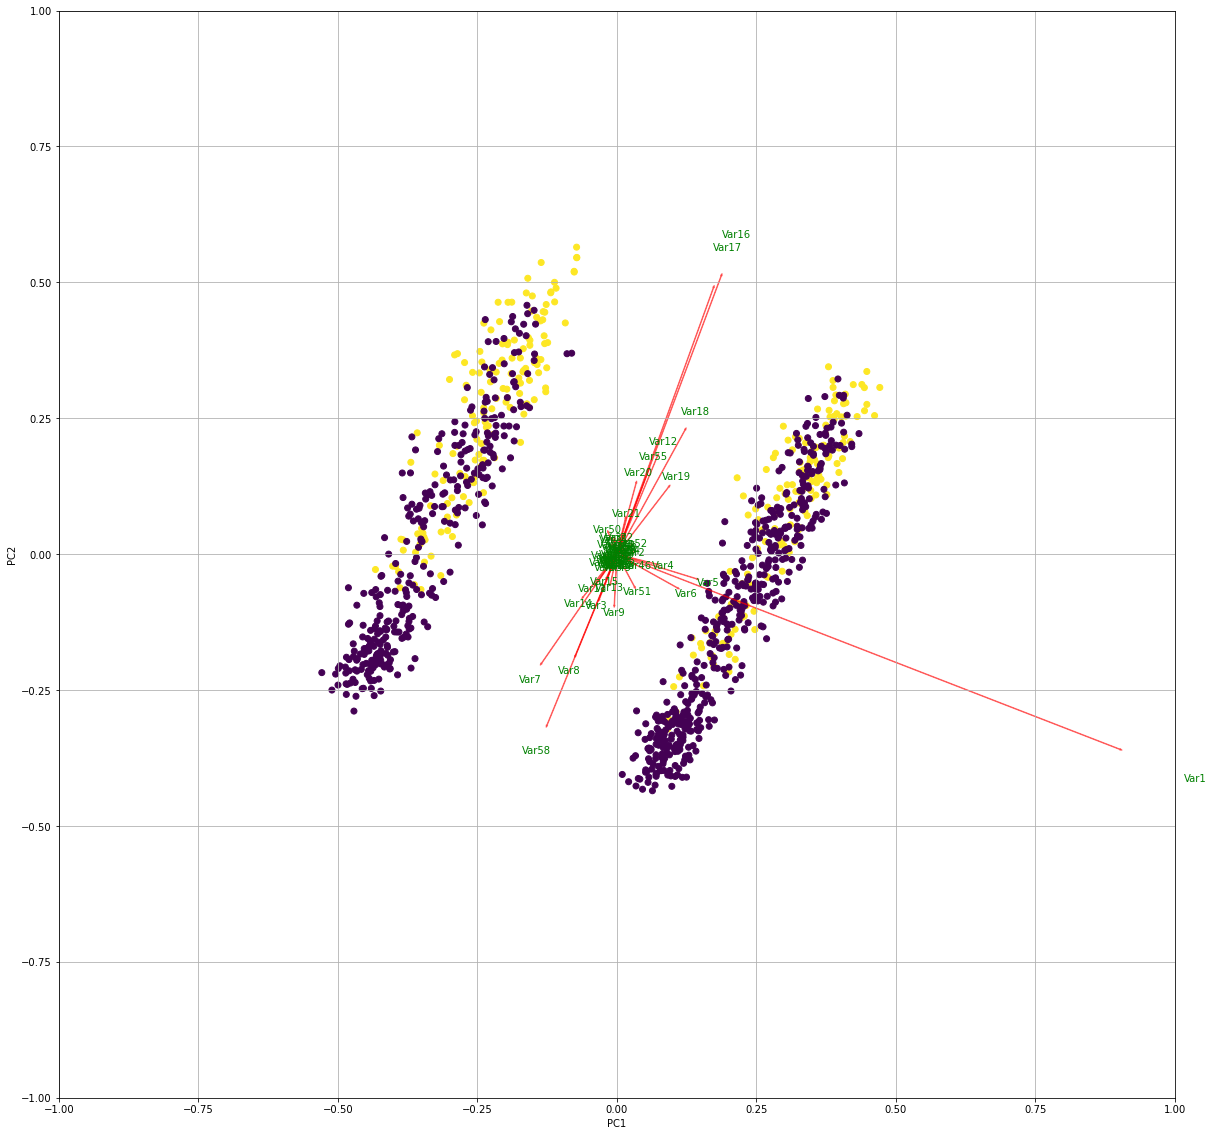

In [402]:
x_new = pca.fit_transform(x)

def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley, c = y)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
plt.figure(figsize = (20,20))
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()

#Call the function. Use only the 2 PCs.
myplot(x_new[:,0:2],np.transpose(pca.components_[0:2, :]))
plt.show()

In [403]:
pca.explained_variance_ratio_
# PC1 explains 19%, PC2 15%, PC3 7%, PC4 6%, PC5 5%, PC6 4%, PC7 3%, PC8 3%, 
# PC8 2%


array([0.15642397, 0.14785368, 0.0749562 , 0.06366998, 0.04294668,
       0.0351969 , 0.03244236, 0.03064328, 0.02849181, 0.02448545,
       0.02286204, 0.02148674, 0.01985553, 0.0189251 , 0.01729787,
       0.01605175, 0.01538925, 0.01470622, 0.01386207, 0.01301268,
       0.01254649, 0.01163522, 0.01121948, 0.01088578, 0.00964651,
       0.00860181, 0.00800943, 0.00794141, 0.00711806, 0.00700698,
       0.00661261, 0.00644637, 0.00623608, 0.00589383, 0.00555509,
       0.00479296, 0.00459685, 0.00434005, 0.0041646 ])

In [404]:
print(cnvif)

['cp', 'cmin', 'ie', 'mew', 'meg', 'megmax', 'dbusl', 'dtraml', 'dtrainl', 'dplight', 'dstation', 'dparkcar', 'dparktw', 'dpedcro', 'dstopsign', 'dtrafficarea', 'droad', 'gvm_dwv', 'speedlimit', 'bicyclecount', 'carcount', 'z_qnr_1', 'z_qnr_2', 'z_qnr_3', 'z_qnr_4', 'z_qnr_6', 'z_qnr_7', 'z_qnr_9', 'z_qnr_11', 'z_qnr_12', 'z_qnr_13', 'z_qnr_14', 'z_qnr_17', 'z_qnr_21', 'z_qnr_22', 'z_qnr_23', 'z_qnr_24', 'z_qnr_25', 'z_qnr_26', 'z_qnr_28', 'z_qnr_31', 'z_qnr_32', 'z_qnr_33', 'z_knr_2', 'z_knr_3', 'z_knr_7', 'z_knr_9', 'z_knr_10', 'z_knr_11', 'trafficarea_1', 'trafficarea_2', 'r_width_1', 'r_width_3', 'r_width_4', 'r_width_5', 'r_width_6', 'speedlimit_2', 'speedlimit_3', 'speedlimit_5', 'speedlimit_6']


In [405]:
print(abs( pca.components_ ))

[[9.01364309e-01 2.70048079e-02 3.16170704e-02 ... 1.25385990e-01
  7.59515316e-03 4.55003006e-03]
 [3.58924952e-01 3.49597333e-03 8.26403084e-02 ... 3.14520371e-01
  1.35894443e-02 5.99056864e-03]
 [1.19911024e-02 2.78894053e-03 5.50623339e-02 ... 2.30030607e-01
  3.04082589e-02 1.75658973e-02]
 ...
 [4.68402855e-03 6.06613718e-02 1.06433266e-04 ... 1.19090705e-01
  1.68367853e-02 1.32998272e-02]
 [7.97670438e-03 1.08038016e-01 2.86941858e-02 ... 1.87350239e-02
  7.86537248e-02 1.90490054e-02]
 [6.80141123e-03 1.12030450e-01 2.62144789e-02 ... 6.22856409e-02
  6.32591708e-02 8.36518856e-03]]


In [406]:
pcal = abs(pca.components_)
dfpca = pd.DataFrame(data = pcal)

In [407]:
dfpca.to_csv('../mtp_jan/pca_conponents_1.csv')

In [64]:
y = dfacrpv['acp']
x = dfacrpv[cnvif]
print(x.shape)

X_train, X_test, y_train, y_test = train_test_split(x, y,
                                                    test_size = 0.3, 
                                                    random_state = 8)

(1087, 60)


In [65]:
np.random.seed(0)

model = PCA(n_components=0.80).fit(X_train)
X_pc = model.transform(X_train)

# number of components
n_pcs= model.components_.shape[0]

# get the index of the most important feature on EACH component
# LIST COMPREHENSION HERE
most_important = [np.abs(model.components_[i]).argmax() for i in range(n_pcs)]

initial_feature_names = cntryn
# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

# LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}

# build the dataframe
df = pd.DataFrame(dic.items())

In [66]:
print(model.explained_variance_ratio_)

[0.15417142 0.15097641 0.07151851 0.06487658 0.04334009 0.03686837
 0.03355992 0.03042794 0.02916998 0.02355751 0.02284832 0.02163929
 0.02057685 0.01873329 0.01738083 0.01612329 0.01564193 0.01492884
 0.01418976]


In [67]:
print(df)

       0              1
0    PC0           cmin
1    PC1        dpedcro
2    PC2        gvm_dwv
3    PC3      dstopsign
4    PC4        gvm_dwv
5    PC5        gvm_dwv
6    PC6  trafficarea_1
7    PC7         mewmax
8    PC8         mewmin
9    PC9          droad
10  PC10          iemax
11  PC11     speedlimit
12  PC12     speedlimit
13  PC13  trafficarea_2
14  PC14          dbusl
15  PC15       z_qnr_32
16  PC16       z_qnr_30
17  PC17       z_qnr_32
18  PC18      r_width_4


In [105]:
print('sizes\n','cnvif',len(cnvif),'\n','cnvifnew',len(cnvifnew),'\n','cntryn',len(cntryn), '\n', 'cntry1', len(cntry1))

sizes
 cnvif 60 
 cnvifnew 61 
 cntryn 63 
 cntry1 59


In [143]:
#
y = dfacrpv['acp']
x = dfacrpv[cntry1]
# x = dfacrpv[cnvif] # 60 variables
print(x.shape)

# X_train, X_test, y_train, y_test = train_test_split(x, y,
#                                                     test_size = 0.3, 
#                                                     random_state = 8)

(1087, 59)


In [141]:
pcs = PCA(n_components = 0.95)
pcs.fit(x)
loadings = pd.DataFrame(pcs.components_, columns = x.columns)
# print(loadings)

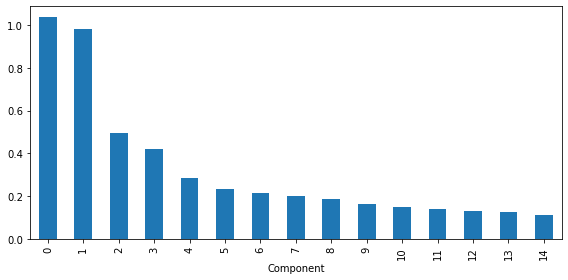

In [123]:
explained_variance = pd.DataFrame(pcs.explained_variance_)
#showing the first value
ax = explained_variance.head(15).plot.bar(legend=False, figsize=(8, 4))
ax.set_xlabel('Component')
plt.tight_layout()
# plt.savefig('pca_top15pc_4_cntry1.png')
plt.show()

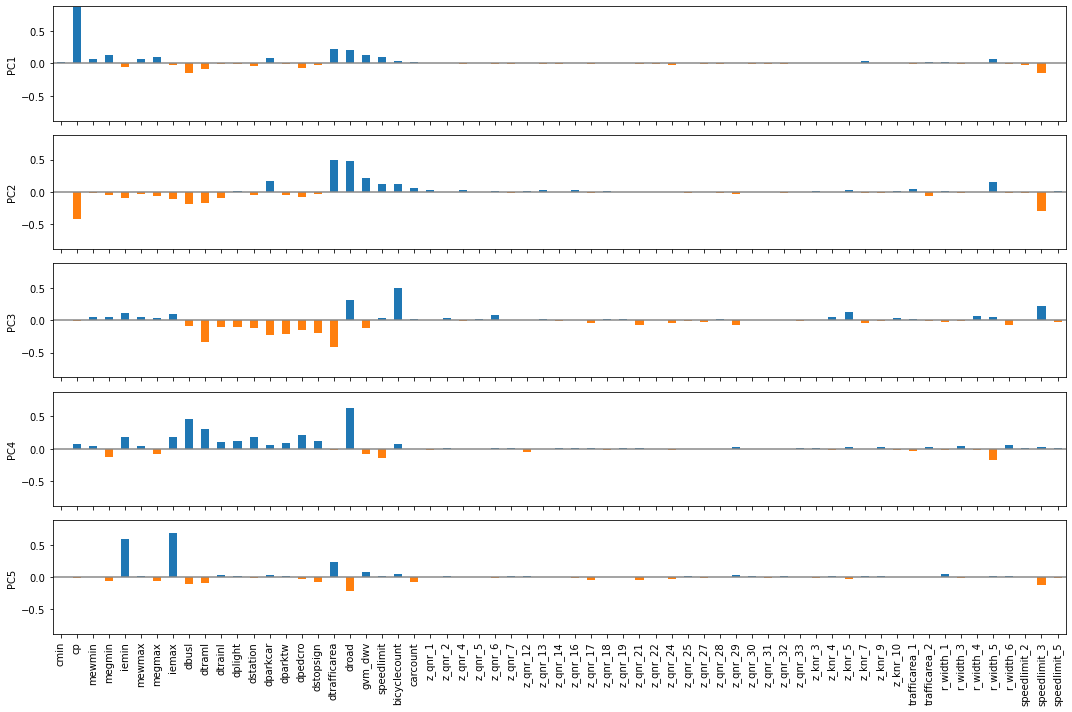

In [144]:
loadings = pd.DataFrame(pcs.components_[0:5, :], 
                        columns=cntryn)
maxPC = 1.01 * np.max(np.max(np.abs(loadings.loc[0:5, :])))
f, axes = plt.subplots(5, 1, figsize=(15, 10), sharex=True)
for i, ax in enumerate(axes):
    pc_loadings = loadings.loc[i, :]
    colors = ['C0' if l > 0 else 'C1' for l in pc_loadings]
    ax.axhline(color='#888888')
    pc_loadings.plot.bar(ax=ax, color=colors)
    ax.set_ylabel(f'PC{i+1}')
    ax.set_ylim(-maxPC, maxPC)
# plt.figure(figsize = (25,20))
plt.tight_layout()
# plt.savefig('pca_top5pc_3_cntryn.png', dpi = 100)
# plt.show()

In [80]:
# loadings.to_csv('../mtp_jan/pca_cnvif_2components.csv')

In [101]:
# def abline(slope, intercept, ax):
#     """Calculate coordinates of a line based on slope and intercept"""
#     x_vals = np.array(ax.get_xlim())
#     return (x_vals, intercept + slope * x_vals)
# ax = x.plot.scatter(x='cp', y='dtrafficarea', alpha=0.3, figsize=(14, 14))
# ax.set_xlim(-0.2, 0.2)
# ax.set_ylim(-0.2, 0.2)
# ax.plot(*abline(loadings.loc[0, 'cp'] / loadings.loc[0, 'dtrafficarea'], 0, ax),
#         '--', color='C1')
# ax.plot(*abline(loadings.loc[1, 'cp'] / loadings.loc[1, 'dtrafficarea'], 0, ax),
#         '--', color='C1')
# plt.tight_layout()
# plt.show()

In [75]:
# # Covariance matrix
# x_cov = np.cov(x.T, ddof=0)
# # eigenvalues and eigenvectors of covariance matrix
# eigenvalues, eigenvectors = eig(x_cov)
# pi = eigenvalues/np.sum(eigenvalues)
# p = np.cumsum(pi)# k = np.min(np.argwhere(p > 0.95)) + 1

# klarge_index = eigenvalues.argsort()[-k:][::-1]
# k_eigenvectors = eigenvectors[klarge_index]
 
# # X和k个特征向量进行点乘
# x_pca = np.dot(x, k_eigenvectors.T)
# print(x_pca) #输出主成分结果
# dfpca = pd.DataFrame(data = x_pca)
# dfpca.to_csv('../mtp_jan/pca_conponents_try.csv')
# # number of components
# n_pcs= x_pca.components_.shape[0]

# # get the index of the most important feature on EACH component
# # LIST COMPREHENSION HERE
# most_important = [np.abs(model.components_[i]).argmax() for i in range(n_pcs)]

# initial_feature_names = cntryn
# # get the names
# most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

# # LIST COMPREHENSION HERE AGAIN
# dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}

# # build the dataframe
# df = pd.DataFrame(dic.items())